<a class="anchor" id="0"></a>
# Sử dụng thuật toán Random Forest để tìm ra các thuộc tính quan trọng


Random Forest là một thuật toán học máy có giám sát dựa trên học tập tập hợp

---

(ensemble learning). Trong bài viết này, tôi xây dựng hai mô hình Random Forest Classifier để dự đoán liệu một người có hủy đơn hay không, một mô hình với 10 cây quyết định (decision-trees) và một mô hình khác với 100 cây quyết định. Độ chính xác dự kiến ​​tăng lên khi số cây quyết định trong mô hình càng nhiều. Tôi đã trình bày quá trình lựa chọn đặc trưng bằng cách sử dụng mô hình Random Forest để tìm ra chỉ các đặc trưng quan trọng, sau đó xây dựng lại mô hình bằng các đặc trưng này và xem hiệu quả của chúng đối với độ chính xác. Tôi đã sử dụng tập dữ liệu phân loại thu nhập cho dự án này.

Vui lòng cho tôi biết nếu bạn cần thông tin chi tiết hơn về cách xây dựng mô hình Random Forest, tính toán độ chính xác, hoặc quá trình lựa chọn đặc trưng. Tôi sẽ cố gắng giúp bạn!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[văn bản liên kết](https://)<a class="anchor" id="0.1"></a>
## NỘI DUNG CỦA BÀI BÁO CÁO


1.	[Đặt vấn đề](#1)
1.	[Các thư viện sử dụng](#2)
1.	[Thêm dữ liệu gốc](#3)
1.	[Thực hiện phân tích dữ liệu](#4)
1.  [Khám phá các biến định tính](#5)
1.  [Khám phá các biến định lượng](#6)
1.  [Declare feature vector and target variable](#7)
1.	[Chia data thành tập dữ liệu train và test](#8)
1.	[Trích chọn feature](#9)
1.  [Feature Scaling](#10)
1.	[Random Forest Classifier với tham số mặc định](#11)
1.	[Random Forest Classifier với 100 Decision Tress](#12)
1.	[Tìm những thuộc tính quan trọng Random Forest model](#13)
1.	[Thể hiện đặc trưng của thuộc tính](#14)
1.	[Xây dựng mô hình Random Forest dựa trên thuộc tính](#15)
1.	[Confusion matrix](#16)
1.	[Classification report](#17)
1.	[Kết quả và kết luận](#18)


## 1. Đặt ra vấn đề <a class="anchor" id="1"></a>

> Văn bản được thụt lề



[Back to Table of Contents](#0.1)

Trong dự án này, tôi cố gắng tạo các dự đoán với nhiệm vụ dự đoán xem một người có hủy đơn hàng của họ hay không. Tôi triển khai mô hình (Random Forest Classification) bằng Python và Scikit-Learn. Vì vậy, để trả lời câu hỏi, tôi xây dựng một bộ phân loại Random Forest để dự đoán xem một người có hủy đơn hàng của họ hay không.

Tôi đã sử dụng tập dữ liệu phân loại thu nhập (sales of USA dataset) cho dự án này..


## 2. Thêm thư viện <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)



In [ ]:
import numpy as np # linear algebra
import pandas as pd # thu vien de import file csv

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
# add thu vien cua rf va plt

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## 3. Thêm dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Olap/sale_dataming.csv')

## 4. Khám phá dữ liệu <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


Bây giờ, tôi sẽ khám phá dữ liệu để thu được thông tin chi tiết về dữ liệu.

### 4.1  View dimensions of dataset <a class="anchor" id="4.1"></a>

In [ ]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (7053, 16)


We can see that there are 7053 instances and 16 attributes in the data set.

### 4.2 Preview the dataset <a class="anchor" id="4.2"></a>

In [ ]:
df.head()

age Gender  price  qty_ordered   value  Discount_Percent  discount_amount  \
0   43      F   89.9           21  1798.0               0.0              0.0   
1   43      F   19.0           11   190.0               0.0              0.0   
2   43      F  149.9            9  1199.2               0.0              0.0   
3   43      F   79.9            9   639.2               0.0              0.0   
4   43      F   99.9            2    99.9               0.0              0.0   

    total       category payment_method  bi_st  year  month State Region  \
0  1798.0  Men's Fashion            cod  Valid  2020     10    OK  South   
1   190.0  Men's Fashion            cod  Valid  2020     10    OK  South   
2  1199.2  Men's Fashion            cod    Net  2020     10    OK  South   
3   639.2  Men's Fashion            cod    Net  2020     10    OK  South   
4    99.9  Men's Fashion            cod  Valid  2020     11    OK  South   

  status_oder  
0   no_cancel  
1   no_cancel  
2   no_cancel  
3   no_cancel  
4   no_cancel

### 4.3 Rename column names <a class="anchor" id="4.3"></a>

Các trường dữ liệu khồng chứa khoảng trắng

### 4.4 View summary of dataset <a class="anchor" id="4.4"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7053 non-null   int64  
 1   Gender            7053 non-null   object 
 2   price             7053 non-null   float64
 3   qty_ordered       7053 non-null   int64  
 4   value             7053 non-null   float64
 5   Discount_Percent  7053 non-null   float64
 6   discount_amount   7053 non-null   float64
 7   total             7053 non-null   float64
 8   category          7053 non-null   object 
 9   payment_method    7053 non-null   object 
 10  bi_st             7053 non-null   object 
 11  year              7053 non-null   int64  
 12  month             7053 non-null   int64  
 13  State             7053 non-null   object 
 14  Region            7053 non-null   object 
 15  status_oder       7053 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

#### Findings

-Chúng ta có thể thấy rằng tập dữ liệu chứa 7 biến ký tự (character variables) và 9 biến số (numerical variables).

Trạng thái đơn hàng (status_order) là biến mục tiêu (target variable).

Không có giá trị thiếu (missing values) trong tập dữ liệu. Tôi sẽ khám phá điều này sau.

### 4.5 Check the data types of columns <a class="anchor" id="4.5"></a>

Lệnh df.info() trên cung cấp cho chúng ta số lượng giá trị đã được điền vào
cùng với kiểu dữ liệu của các cột.

Nếu chúng ta chỉ muốn kiểm tra kiểu dữ liệu của một cột cụ thể, chúng ta có thể sử dụng lệnh sau đây.

In [ ]:
df.dtypes

age                   int64
Gender               object
price               float64
qty_ordered           int64
value               float64
Discount_Percent    float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
year                  int64
month                 int64
State                object
Region               object
status_oder          object
dtype: object

### 4.6 View statistical properties of dataset <a class="anchor" id="4.6"></a>

In [ ]:
df.describe()

age         price  qty_ordered         value  Discount_Percent  \
count  7053.000000   7053.000000  7053.000000   7053.000000       7053.000000   
mean     46.517368    680.712442     2.780802    646.331506          5.955819   
std      14.338145   1331.385640     3.093851   1247.895944         10.019254   
min      18.000000      0.000000     1.000000      0.000000          0.000000   
25%      35.000000     35.500000     2.000000     38.300000          0.000000   
50%      46.000000    103.500000     2.000000    124.900000          0.000000   
75%      59.000000    840.000000     3.000000    680.000000         11.019912   
max      75.000000  10899.900000    51.000000  10899.900000         69.444444   

       discount_amount         total         year        month  
count      7053.000000   7053.000000  7053.000000  7053.000000  
mean         56.337925    589.993581  2020.380831     8.513115  
std         157.097921   1173.559864     0.485626     3.497630  
min           0.000000      0.000000  2020.000000     1.000000  
25%           0.000000     37.000000  2020.000000     6.000000  
50%           0.000000    115.500000  2020.000000    10.000000  
75%          11.960000    670.000000  2021.000000    11.000000  
max        1800.000000  10899.900000  2021.000000    12.000000

#### Important points to note

Lệnh df.describe() trên giúp chúng ta xem các thuộc tính thống kê của các biến số (numerical variables). Nó không bao gồm các biến ký tự (character variables).

Nếu chúng ta muốn xem các thuộc tính thống kê của các biến ký tự, chúng ta nên chạy lệnh sau đây:

    df.describe(include=['object'])

Nếu chúng ta muốn xem các thuộc tính thống kê của tất cả các biến, chúng ta nên chạy lệnh sau đây:

    df.describe(include='all')

In [ ]:
df.describe(include='all')

age Gender         price  qty_ordered         value  \
count   7053.000000   7053   7053.000000  7053.000000   7053.000000   
unique          NaN      2           NaN          NaN           NaN   
top             NaN      M           NaN          NaN           NaN   
freq            NaN   3822           NaN          NaN           NaN   
mean      46.517368    NaN    680.712442     2.780802    646.331506   
std       14.338145    NaN   1331.385640     3.093851   1247.895944   
min       18.000000    NaN      0.000000     1.000000      0.000000   
25%       35.000000    NaN     35.500000     2.000000     38.300000   
50%       46.000000    NaN    103.500000     2.000000    124.900000   
75%       59.000000    NaN    840.000000     3.000000    680.000000   
max       75.000000    NaN  10899.900000    51.000000  10899.900000   

        Discount_Percent  discount_amount         total           category  \
count        7053.000000      7053.000000   7053.000000               7053   
unique               NaN              NaN           NaN                 15   
top                  NaN              NaN           NaN  Mobiles & Tablets   
freq                 NaN              NaN           NaN               1534   
mean            5.955819        56.337925    589.993581                NaN   
std            10.019254       157.097921   1173.559864                NaN   
min             0.000000         0.000000      0.000000                NaN   
25%             0.000000         0.000000     37.000000                NaN   
50%             0.000000         0.000000    115.500000                NaN   
75%            11.019912        11.960000    670.000000                NaN   
max            69.444444      1800.000000  10899.900000                NaN   

       payment_method  bi_st         year        month State   Region  \
count            7053   7053  7053.000000  7053.000000  7053     7053   
unique             11      3          NaN          NaN    51        4   
top               cod  Valid          NaN          NaN    OH  Midwest   
freq             3455   2841          NaN          NaN   520     2584   
mean              NaN    NaN  2020.380831     8.513115   NaN      NaN   
std               NaN    NaN     0.485626     3.497630   NaN      NaN   
min               NaN    NaN  2020.000000     1.000000   NaN      NaN   
25%               NaN    NaN  2020.000000     6.000000   NaN      NaN   
50%               NaN    NaN  2020.000000    10.000000   NaN      NaN   
75%               NaN    NaN  2021.000000    11.000000   NaN      NaN   
max               NaN    NaN  2021.000000    12.000000   NaN      NaN   

       status_oder  
count         7053  
unique           2  
top      no_cancel  
freq          3884  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

### 4.7 Check for missing values <a class="anchor" id="4.7"></a>


Trong Python, dữ liệu bị thiếu được biểu diễn bằng hai giá trị:

  +None: None là một đối tượng đơn lẻ (singleton object) trong Python thường được sử dụng để đại diện cho dữ liệu bị thiếu trong mã Python.

  +NaN: NaN là viết tắt của "Not a Number". Đây là một giá trị đặc biệt dạng số thực được công nhận bởi tất cả các hệ thống sử dụng biểu diễn số thực chuẩn IEEE.

Có các phương pháp khác nhau để phát hiện dữ liệu bị thiếu.

    Hàm Pandas isnull() và notnull()
    Pandas cung cấp hai hàm để kiểm tra dữ liệu bị thiếu - isnull() và notnull().

Đây là các hàm đơn giản trả về một giá trị boolean cho biết liệu giá trị đưa vào có phải là dữ liệu bị thiếu hay không.

Dưới đây, tôi sẽ liệt kê một số lệnh hữu ích để xử lý dữ liệu bị thiếu.

-Các lệnh hữu ích để phát hiện dữ liệu bị thiếu
  df.isnull()
Lệnh trên kiểm tra xem mỗi ô trong dataframe có chứa dữ liệu bị thiếu hay không. Nếu ô chứa dữ liệu bị thiếu, nó trả về True, ngược lại trả về False.

    df.isnull().sum()
Lệnh trên trả về tổng số lượng dữ liệu bị thiếu trong mỗi cột trong dataframe.

    df.isnull().sum().sum()
Nó trả về tổng số lượng dữ liệu bị thiếu trong toàn bộ dataframe.

    df.isnull().mean()
Nó trả về tỷ lệ phần trăm dữ liệu bị thiếu trong mỗi cột trong dataframe.

    df.isnull().any()
Nó kiểm tra xem cột nào có giá trị null và cột nào không. Các cột có giá trị null sẽ trả về TRUE và FALSE nếu không có giá trị null.

    df.isnull().any().any()
Nó trả về một giá trị boolean cho biết liệu dataframe có chứa dữ liệu bị thiếu hay không. Nếu dataframe chứa dữ liệu bị thiếu, nó trả về TRUE, ngược lại trả về FALSE.

    df.isnull().values.any()
Nó kiểm tra xem một cột cụ thể có chứa dữ liệu bị thiếu hay không. Nếu cột chứa dữ liệu bị thiếu, thì nó trả về TRUE, ngược lại trả về FALSE.

    df.isnull().values.sum()
Nó trả về tổng số lượng dữ liệu bị thiếu trong dataframe.


In [ ]:
# check for missing values

df.isnull().sum()

age                 0
Gender              0
price               0
qty_ordered         0
value               0
Discount_Percent    0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
year                0
month               0
State               0
Region              0
status_oder         0
dtype: int64

#### Interpretation

Chúng ta có thể thấy không có missing values trong dataset.

### 4.8 Check with ASSERT statement <a class="anchor" id="4.8"></a>


Chúng ta phải xác nhận rằng tập dữ liệu của chúng ta không có giá trị bị thiếu.

Chúng ta có thể sử dụng câu lệnh Assert để kiểm tra điều này.

Chúng ta có thể sử dụng câu lệnh assert để kiểm tra tự động rằng không có giá trị bị thiếu, giá trị 0 hoặc giá trị âm không mong đợi có tồn tại.

Điều này giúp chúng ta tự tin rằng mã của chúng ta đang chạy đúng.

Câu lệnh Assert sẽ không trả về gì nếu giá trị được kiểm tra là đúng và sẽ ném ra một AssertionError nếu giá trị là sai.

Câu lệnh Assert:

    assert 1 == 1 (không trả về gì nếu giá trị là Đúng)

    assert 1 == 2 (ném ra AssertionError nếu giá trị là Sai)

In [ ]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

#### Giải thích:
Lệnh trên không ném ra bất kỳ lỗi nào. Vì vậy, có thể xác nhận rằng không có giá trị bị thiếu hoặc giá trị âm trong tập dữ liệu.

Tất cả các giá trị đều lớn hơn hoặc bằng không, trừ các giá trị ký tự (character values).

### 4.9 Functional approach to EDA <a class="anchor" id="4.9"></a>

Hiển thị thông tin cơ bản về tập dữ liệu, chẳng hạn như số hàng và số cột, kiểu dữ liệu của biến, và thống kê tóm tắt.


In [ ]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


In [ ]:
initial_eda(df)

Dimensions : 7053 rows, 16 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           58          0
                                Gender     object            2          0
                                 price    float64         1569          0
                           qty_ordered      int64           21          0
                                 value    float64         1759          0
                      Discount_Percent    float64          884          0
                       discount_amount    float64          843          0
                                 total    float64         2340          0
                              category     object           15          0
                        payment_method     object           11          0
                                 bi_st     object            3          0
                                  year      int64     

### Types of variables


Trong phần này, tôi phân loại tập dữ liệu thành các biến phân loại và biến số.

Trong tập dữ liệu này, có sự kết hợp của các biến phân loại và biến số.

Các biến phân loại có kiểu dữ liệu là object. Các biến số có kiểu dữ liệu là int64, float64.

Đầu tiên, tôi sẽ khám phá các biến phân loại.

## 5. Khám phá các biến phân loại (categorical variables)  <a class="anchor" id="5"></a>


[Back to Table of Contents](#0.1)

### 5.1 Find categorical variables

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Gender', 'category', 'payment_method', 'bi_st', 'State', 'Region', 'status_oder']


### 5.2 Preview categorical variables

In [ ]:
df[categorical].head()

Gender       category payment_method  bi_st State Region status_oder
0      F  Men's Fashion            cod  Valid    OK  South   no_cancel
1      F  Men's Fashion            cod  Valid    OK  South   no_cancel
2      F  Men's Fashion            cod    Net    OK  South   no_cancel
3      F  Men's Fashion            cod    Net    OK  South   no_cancel
4      F  Men's Fashion            cod  Valid    OK  South   no_cancel

### 5.3 Summary of categorical variables

- Có 12 biến phân loại trong tập dữ liệu.

Các biến phân loại bao gồm: order_date	status	sku	category	payment_method	bi_st	Gender	full_name	County	City	State	Region

Total là biến mục tiêu (target variable).

### 5.4 Frequency distribution of categorical variables

Now, we will check the frequency distribution of categorical variables.

In [ ]:
for var in categorical:

    print(df[var].value_counts())

M    3822
F    3231
Name: Gender, dtype: int64
Mobiles & Tablets     1534
Men's Fashion         1067
Women's Fashion        926
Appliances             725
Superstore             550
Soghaat                461
Beauty & Grooming      408
Entertainment          340
Home & Living          320
Others                 216
Computing              163
Health & Sports        154
Kids & Baby            149
School & Education      23
Books                   17
Name: category, dtype: int64
cod                3455
Easypay            1100
Payaxis            1076
easypay_voucher     445
bankalfalah         257
Easypay_MA          236
customercredit      159
jazzwallet          141
jazzvoucher         122
apg                  44
mcblite              18
Name: payment_method, dtype: int64
Valid    2841
Net      2338
Gross    1874
Name: bi_st, dtype: int64
OH    520
AK    348
CA    344
IA    330
WI    327
SD    318
NC    317
WV    298
IL    290
PA    285
KS    254
VA    238
CT    227
HI    216
TX    197
MI

### 5.5 Percentage of frequency distribution of values

In [ ]:
for var in categorical:

     print(df[var].value_counts()/np.float(len(df)))

M    0.541897
F    0.458103
Name: Gender, dtype: float64
Mobiles & Tablets     0.217496
Men's Fashion         0.151283
Women's Fashion       0.131292
Appliances            0.102793
Superstore            0.077981
Soghaat               0.065362
Beauty & Grooming     0.057848
Entertainment         0.048206
Home & Living         0.045371
Others                0.030625
Computing             0.023111
Health & Sports       0.021835
Kids & Baby           0.021126
School & Education    0.003261
Books                 0.002410
Name: category, dtype: float64
cod                0.489862
Easypay            0.155962
Payaxis            0.152559
easypay_voucher    0.063094
bankalfalah        0.036438
Easypay_MA         0.033461
customercredit     0.022544
jazzwallet         0.019991
jazzvoucher        0.017298
apg                0.006238
mcblite            0.002552
Name: payment_method, dtype: float64
Valid    0.402807
Net      0.331490
Gross    0.265703
Name: bi_st, dtype: float64
OH    0.073727
AK   

#### Comment

Dữ liệu khá tốt

### 5.6 Phân tích các thuộc tính


#### Explore `income` target variable

In [ ]:
# check for missing values

df['status_oder'].isnull().sum()

0

Không có null ở cột status_oder

In [ ]:
# view number of unique values

df['status_oder'].nunique()

2

Có 2 giá trị duy nhất trong biến `status_oder`.

In [ ]:
# view the unique values

df['status_oder'].unique()

array(['no_cancel', 'cancel_order'], dtype=object)

Có 2 giá trị là 'no_cancel' và 'cancel_order'.

In [ ]:
# view the frequency distribution of values

df['status_oder'].value_counts()

no_cancel       3884
cancel_order    3169
Name: status_oder, dtype: int64

In [ ]:
# view percentage of frequency distribution of values

df['status_oder'].value_counts()/len(df)

no_cancel       0.550688
cancel_order    0.449312
Name: status_oder, dtype: float64

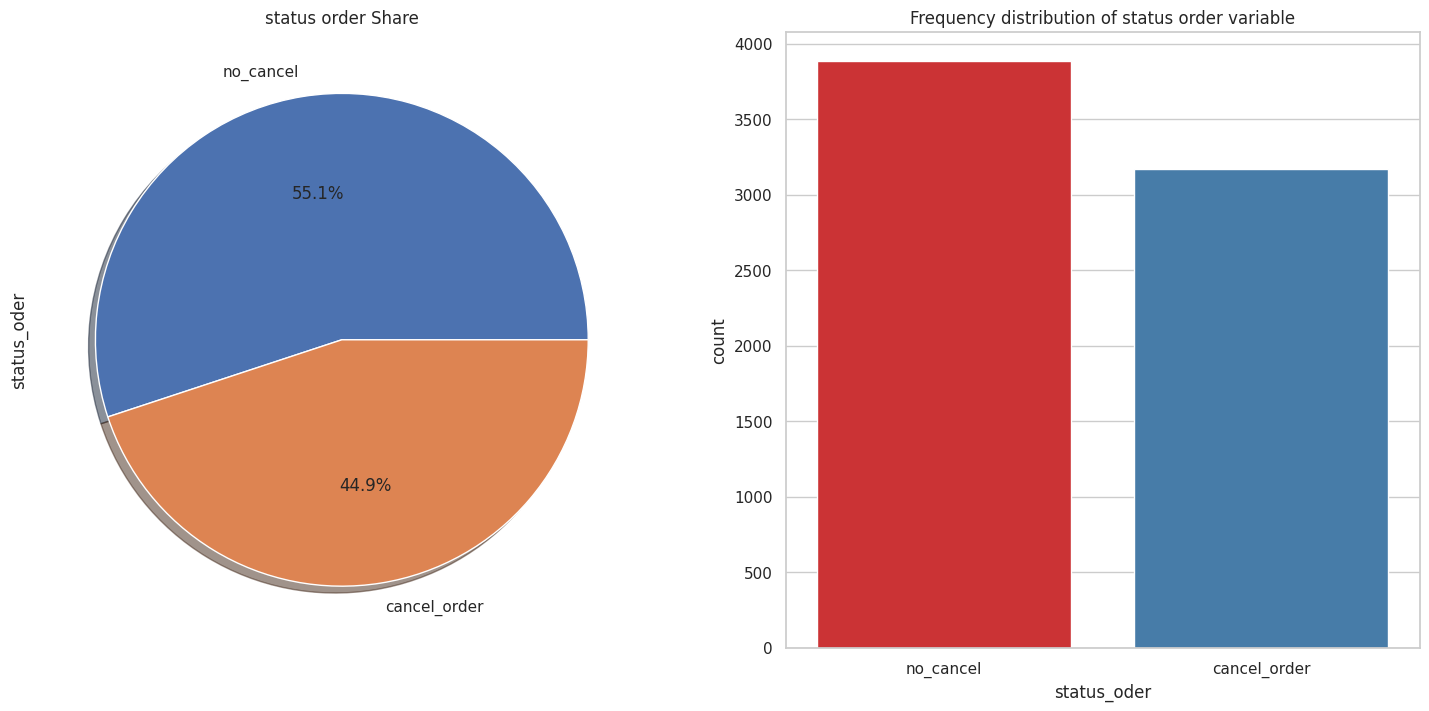

In [ ]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['status_oder'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('status order Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="status_oder", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of status order variable")

plt.show()


We can plot the bars horizontally as follows :-

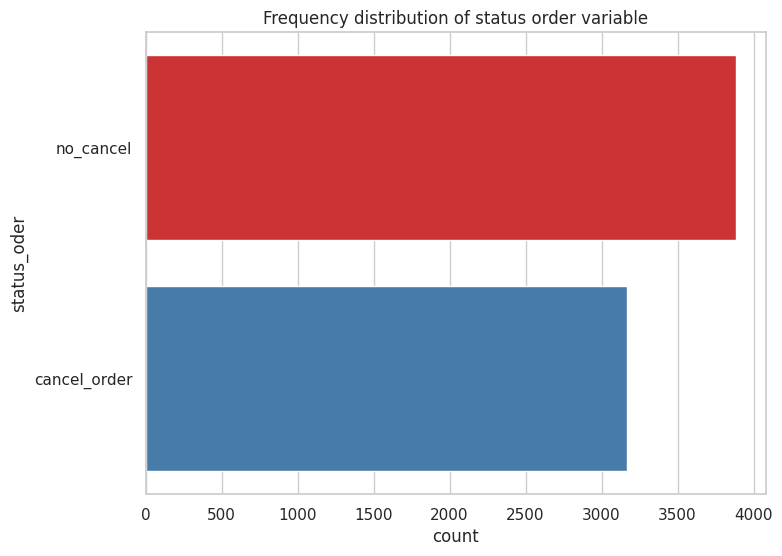

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="status_oder", data=df, palette="Set1")
ax.set_title("Frequency distribution of status order variable")
plt.show()

#### Visualize `income` wrt `sex` variable

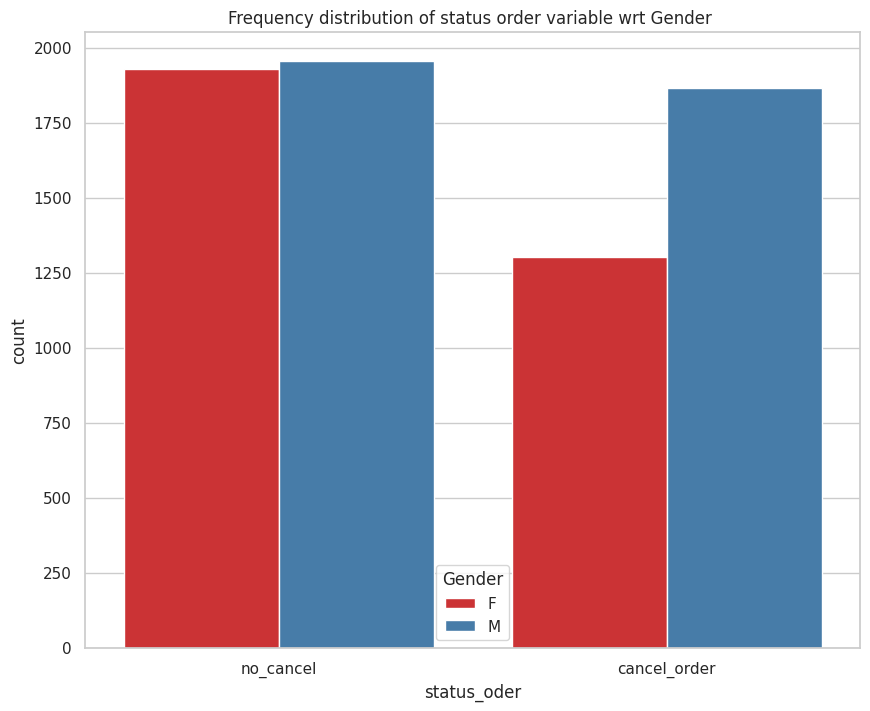

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="status_oder", hue="Gender", data=df, palette="Set1")
ax.set_title("Frequency distribution of status order variable wrt Gender ")
plt.show()

#### Interpretation


- Chúng ta có thể thấy được tỉ lệ hủy đơn ở nam là nhiều hơn ở nữ

#### Visualize `income` wrt `race`

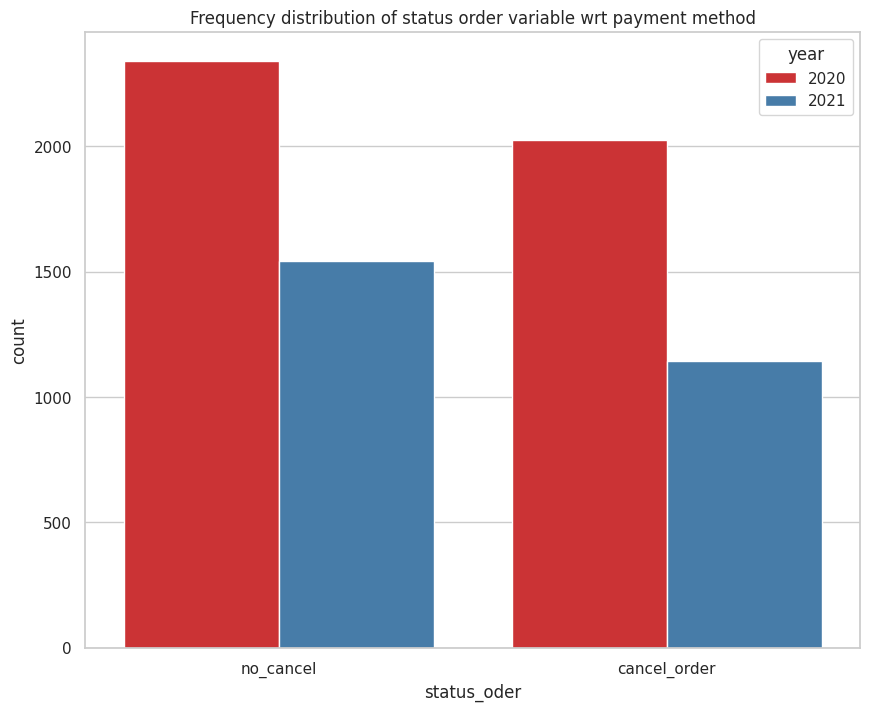

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="status_oder", hue="year", data=df, palette="Set1")
ax.set_title("Frequency distribution of status order variable wrt payment method")
plt.show()

#### Interpretation


-Chúng ta có thể thấy lượng đặt hàng 2021 giảm so với năm 2020

#### Explore `payment_method` variable

In [ ]:
# check number of unique labels

df.payment_method.nunique()

11

In [ ]:
# view the unique labels

df.payment_method.unique()

array(['cod', 'Payaxis', 'Easypay', 'jazzwallet', 'Easypay_MA',
       'jazzvoucher', 'easypay_voucher', 'customercredit', 'bankalfalah',
       'apg', 'mcblite'], dtype=object)

In [ ]:
# view frequency distribution of values

df.payment_method.value_counts()

cod                3455
Easypay            1100
Payaxis            1076
easypay_voucher     445
bankalfalah         257
Easypay_MA          236
customercredit      159
jazzwallet          141
jazzvoucher         122
apg                  44
mcblite              18
Name: payment_method, dtype: int64

Dữ liệu tốt

#### Visualize `payment_method` variable

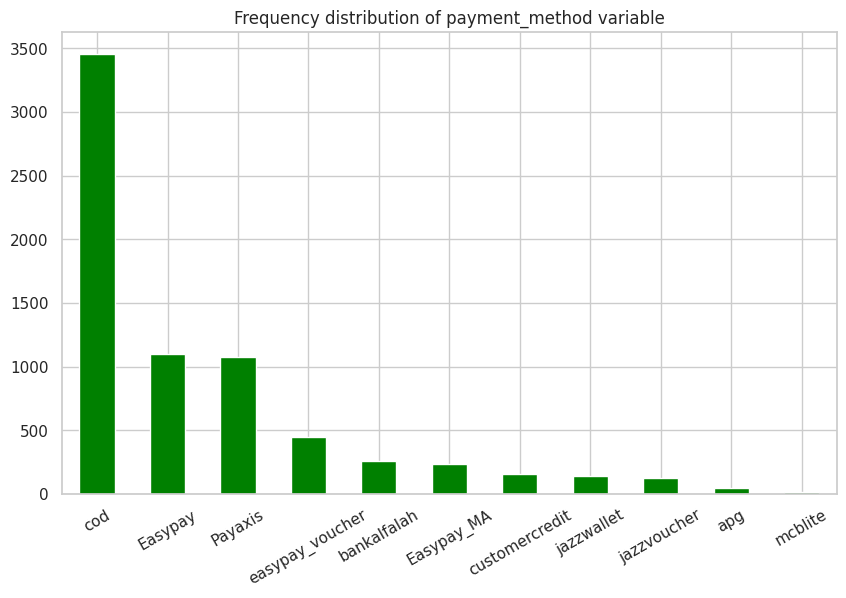

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.payment_method.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of payment_method variable")
ax.set_xticklabels(df.payment_method.value_counts().index, rotation=30)
plt.show()

#### Interpretation


- Chúng ta có thể thấy phương thức thanh toán trực tiếp bằng tiền mặt (cod) là chủ yếu nhiều hơn so với các phương thức còn lại (thanh toán trực tuyến).

#### Visualize `payment_method` variable wrt `status_oder` variable

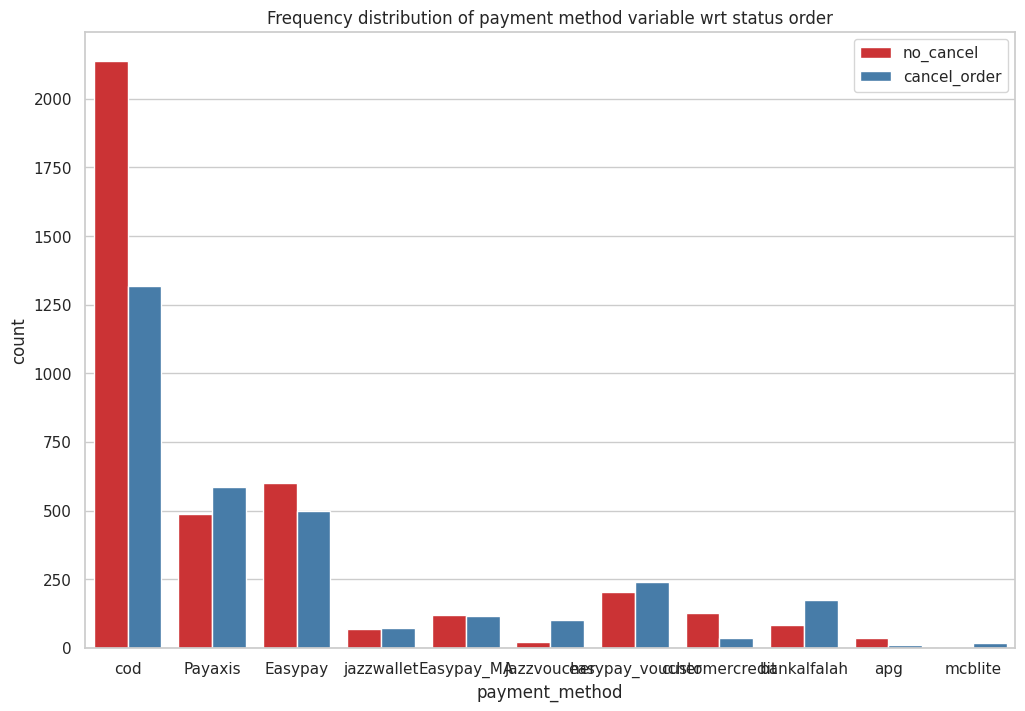

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="payment_method", hue="status_oder", data=df, palette="Set1")
ax.set_title("Frequency distribution of payment method variable wrt status order")
ax.legend(loc='upper right')
plt.show()

#### Interpretation


- Chúng ta có thể thấy tỷ lệ hủy đơn ít hơn không hủy đơn ở các phương thức thanh toán trực tiếp (cod)
-Các phương thức thanh toán khác có tỉ lệ hủy đơn và không hủy đơn gần như nhau.


#### Visualize `payment_method` variable wrt `Gender` variable

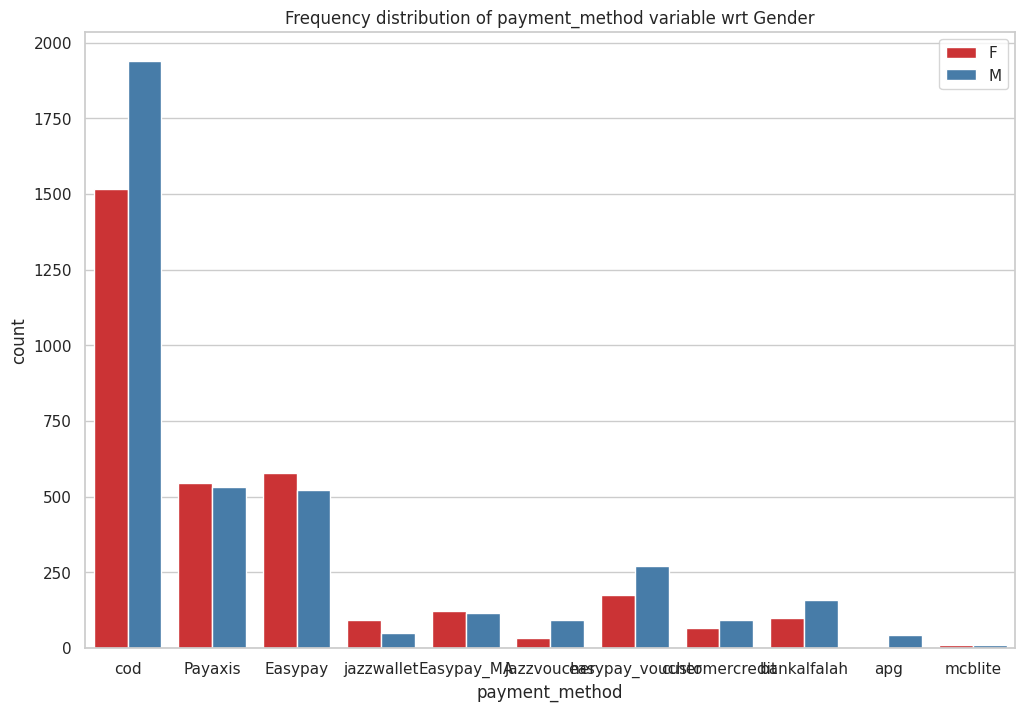

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="payment_method", hue="Gender", data=df, palette="Set1")
ax.set_title("Frequency distribution of payment_method variable wrt Gender")
ax.legend(loc='upper right')
plt.show()

#### Interpretation


- Chúng ta có thể thấy tỷ lệ nam nhiều hơn nữ ở các phương thức thanh toán trực tiếp (cod)
-Các phương thức thanh toán khác có tỉ lệ nam nữ gần như nhau.


### 5.7 Check missing values in categorical variables

In [ ]:
df[categorical].isnull().sum()

Gender            0
category          0
payment_method    0
bi_st             0
State             0
Region            0
status_oder       0
dtype: int64

Không có cột nào rỗng.

### 5.8 Number of labels: Cardinality

- The number of labels within a categorical variable is known as **cardinality**.

- A high number of labels within a variable is known as **high cardinality**.

- High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels
category  contains  15  labels
payment_method  contains  11  labels
bi_st  contains  3  labels
State  contains  51  labels
Region  contains  4  labels
status_oder  contains  2  labels


Cột City, County có labels khá lớn.

## 6. Phân tích các thuộc tính định lượng <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)

### 6.1  Find numerical variables

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 9 numerical variables

The numerical variables are :

 ['age', 'price', 'qty_ordered', 'value', 'Discount_Percent', 'discount_amount', 'total', 'year', 'month']


### 6.2 Preview the numerical variables

In [ ]:
df[numerical].head()

age  price  qty_ordered   value  Discount_Percent  discount_amount   total  \
0   43   89.9           21  1798.0               0.0              0.0  1798.0   
1   43   19.0           11   190.0               0.0              0.0   190.0   
2   43  149.9            9  1199.2               0.0              0.0  1199.2   
3   43   79.9            9   639.2               0.0              0.0   639.2   
4   43   99.9            2    99.9               0.0              0.0    99.9   

   year  month  
0  2020     10  
1  2020     10  
2  2020     10  
3  2020     10  
4  2020     11

### 6.3 Summary of numerical variables

-  12 variables.

- Các cột age,	price,	qty_ordered,	value,	Discount_Percent,	discount_amount,	total,	year,	month.

- Tất cả là dữ liệu kiểu số.

### 6.4 Check missing values in numerical variables

In [ ]:
df[numerical].isnull().sum()

age                 0
price               0
qty_ordered         0
value               0
Discount_Percent    0
discount_amount     0
total               0
year                0
month               0
dtype: int64

Không có dữ liệu null.

### 6.5 Explore numerical variables

#### Explore `age` variable

In [ ]:
df['age'].nunique()

58

#### View the distribution of `age` variable

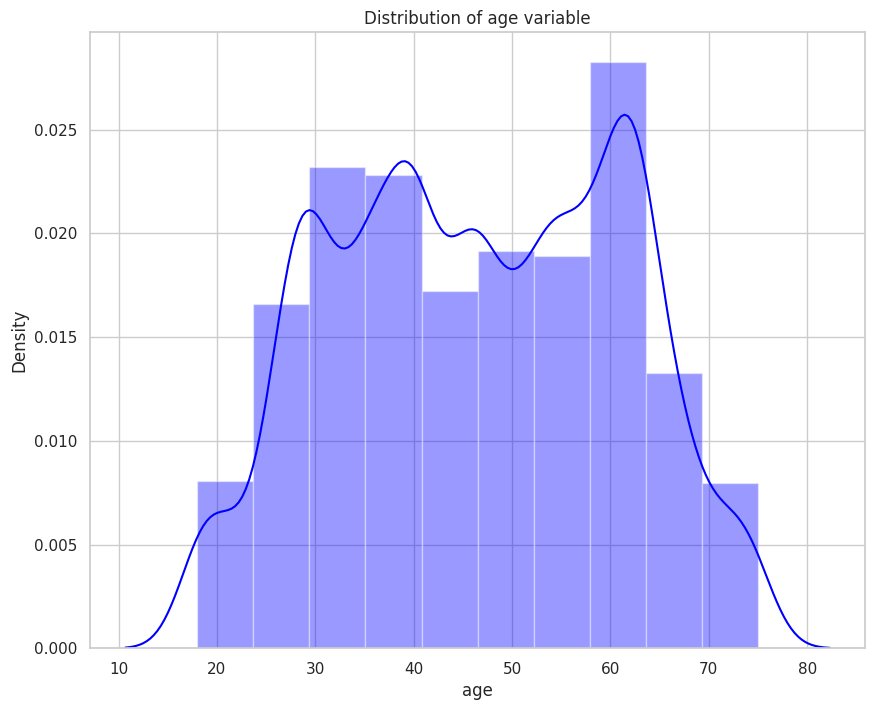

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

- Chúng ta có thể thấy rằng `age' phân bố chủ yếu từ 30 - 60 tuổi.
- Nhiều nhất là 60 tuổi.

Chúng ta có thể tô màu dưới đường cong mật độ và sử dụng một màu khác nhau như sau:

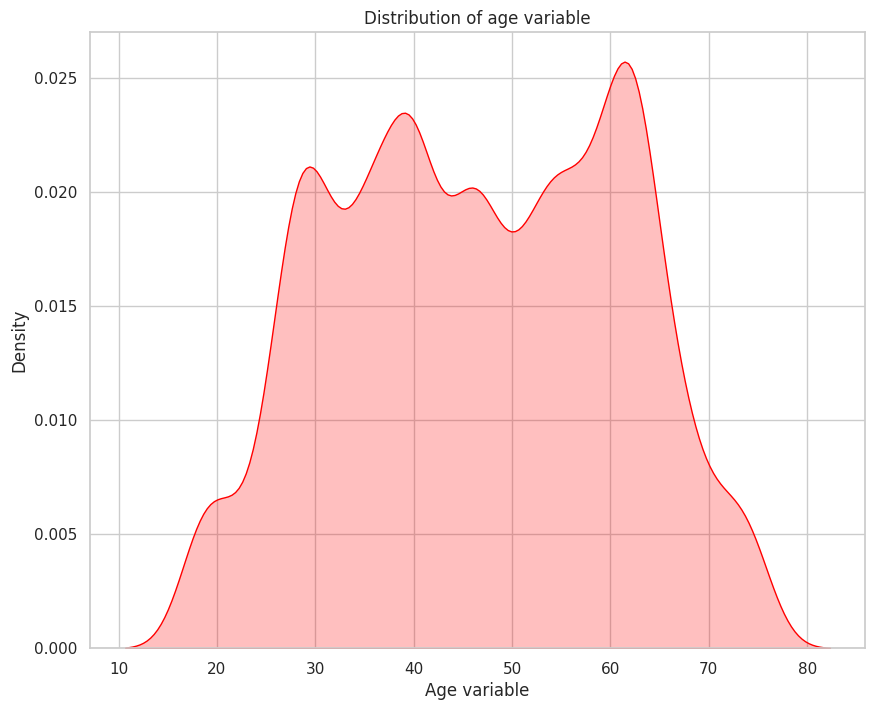

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

#### Detect outliers in `age` variable with boxplot

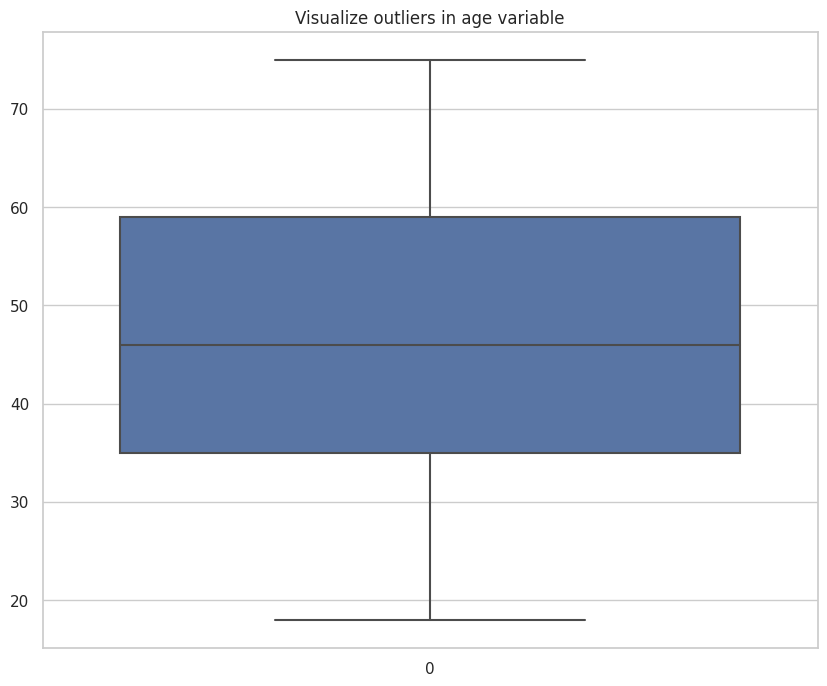

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

Độ tuổi mua hàng phân bố từ 35- 60

#### Explore relationship between `age` and `income` variables

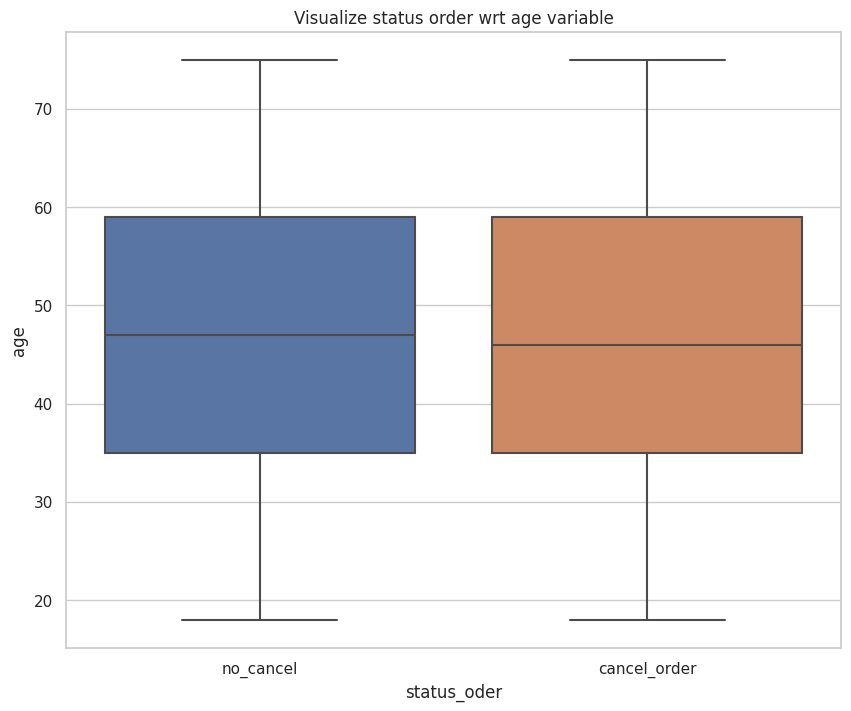

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="status_oder", y="age", data=df)
ax.set_title("Visualize status order wrt age variable")
plt.show()

#### Interpretation

Độ tuổi hủy đơn và không hủy đơn là như nhau.

#### Visualize `income` wrt `age` and `sex` variable

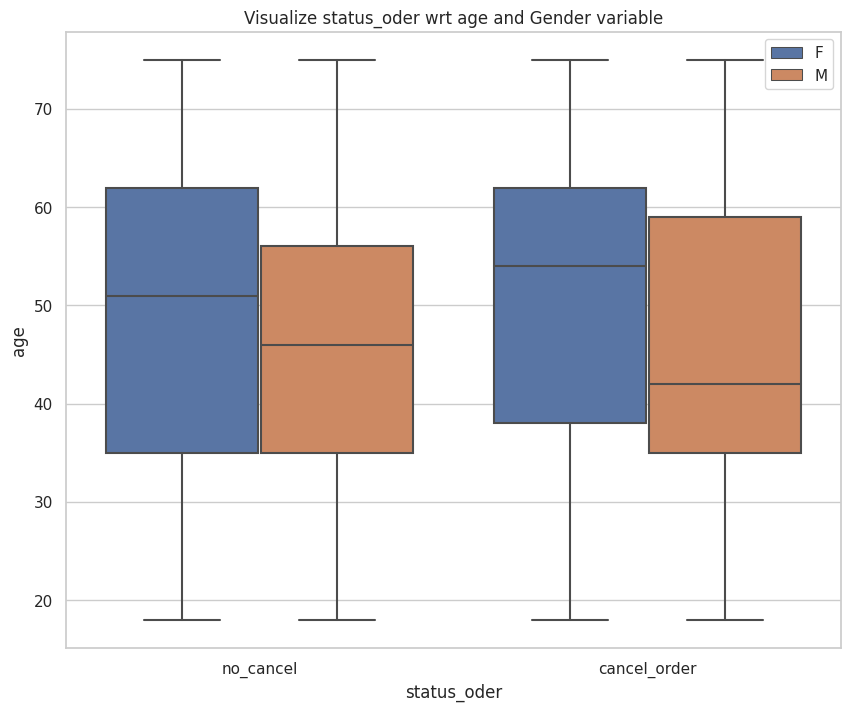

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="status_oder", y="age", hue="Gender", data=df)
ax.set_title("Visualize status_oder wrt age and Gender variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 800x600 with 0 Axes>

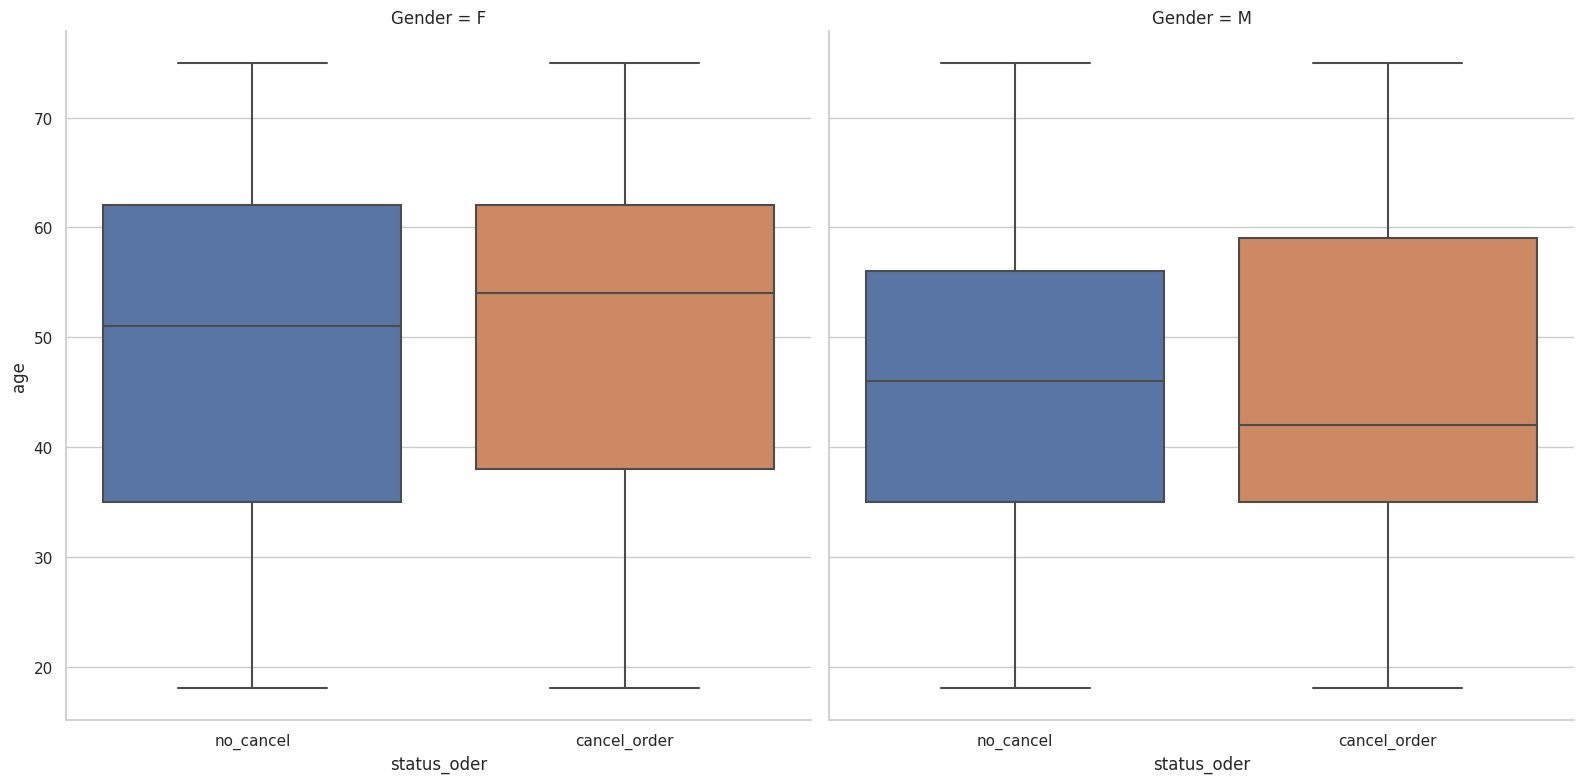

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="status_oder", y="age", col="Gender", data=df, kind="box", height=8, aspect=1)
plt.show()

#### Interpretation

- ở nam các lớn tuổi càng dễ hủy đơn.

#### Find out the correlations

In [ ]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#### Interpretation

- We can see that there is no strong correlation between variables.

#### Plot pairwise relationships in dataset

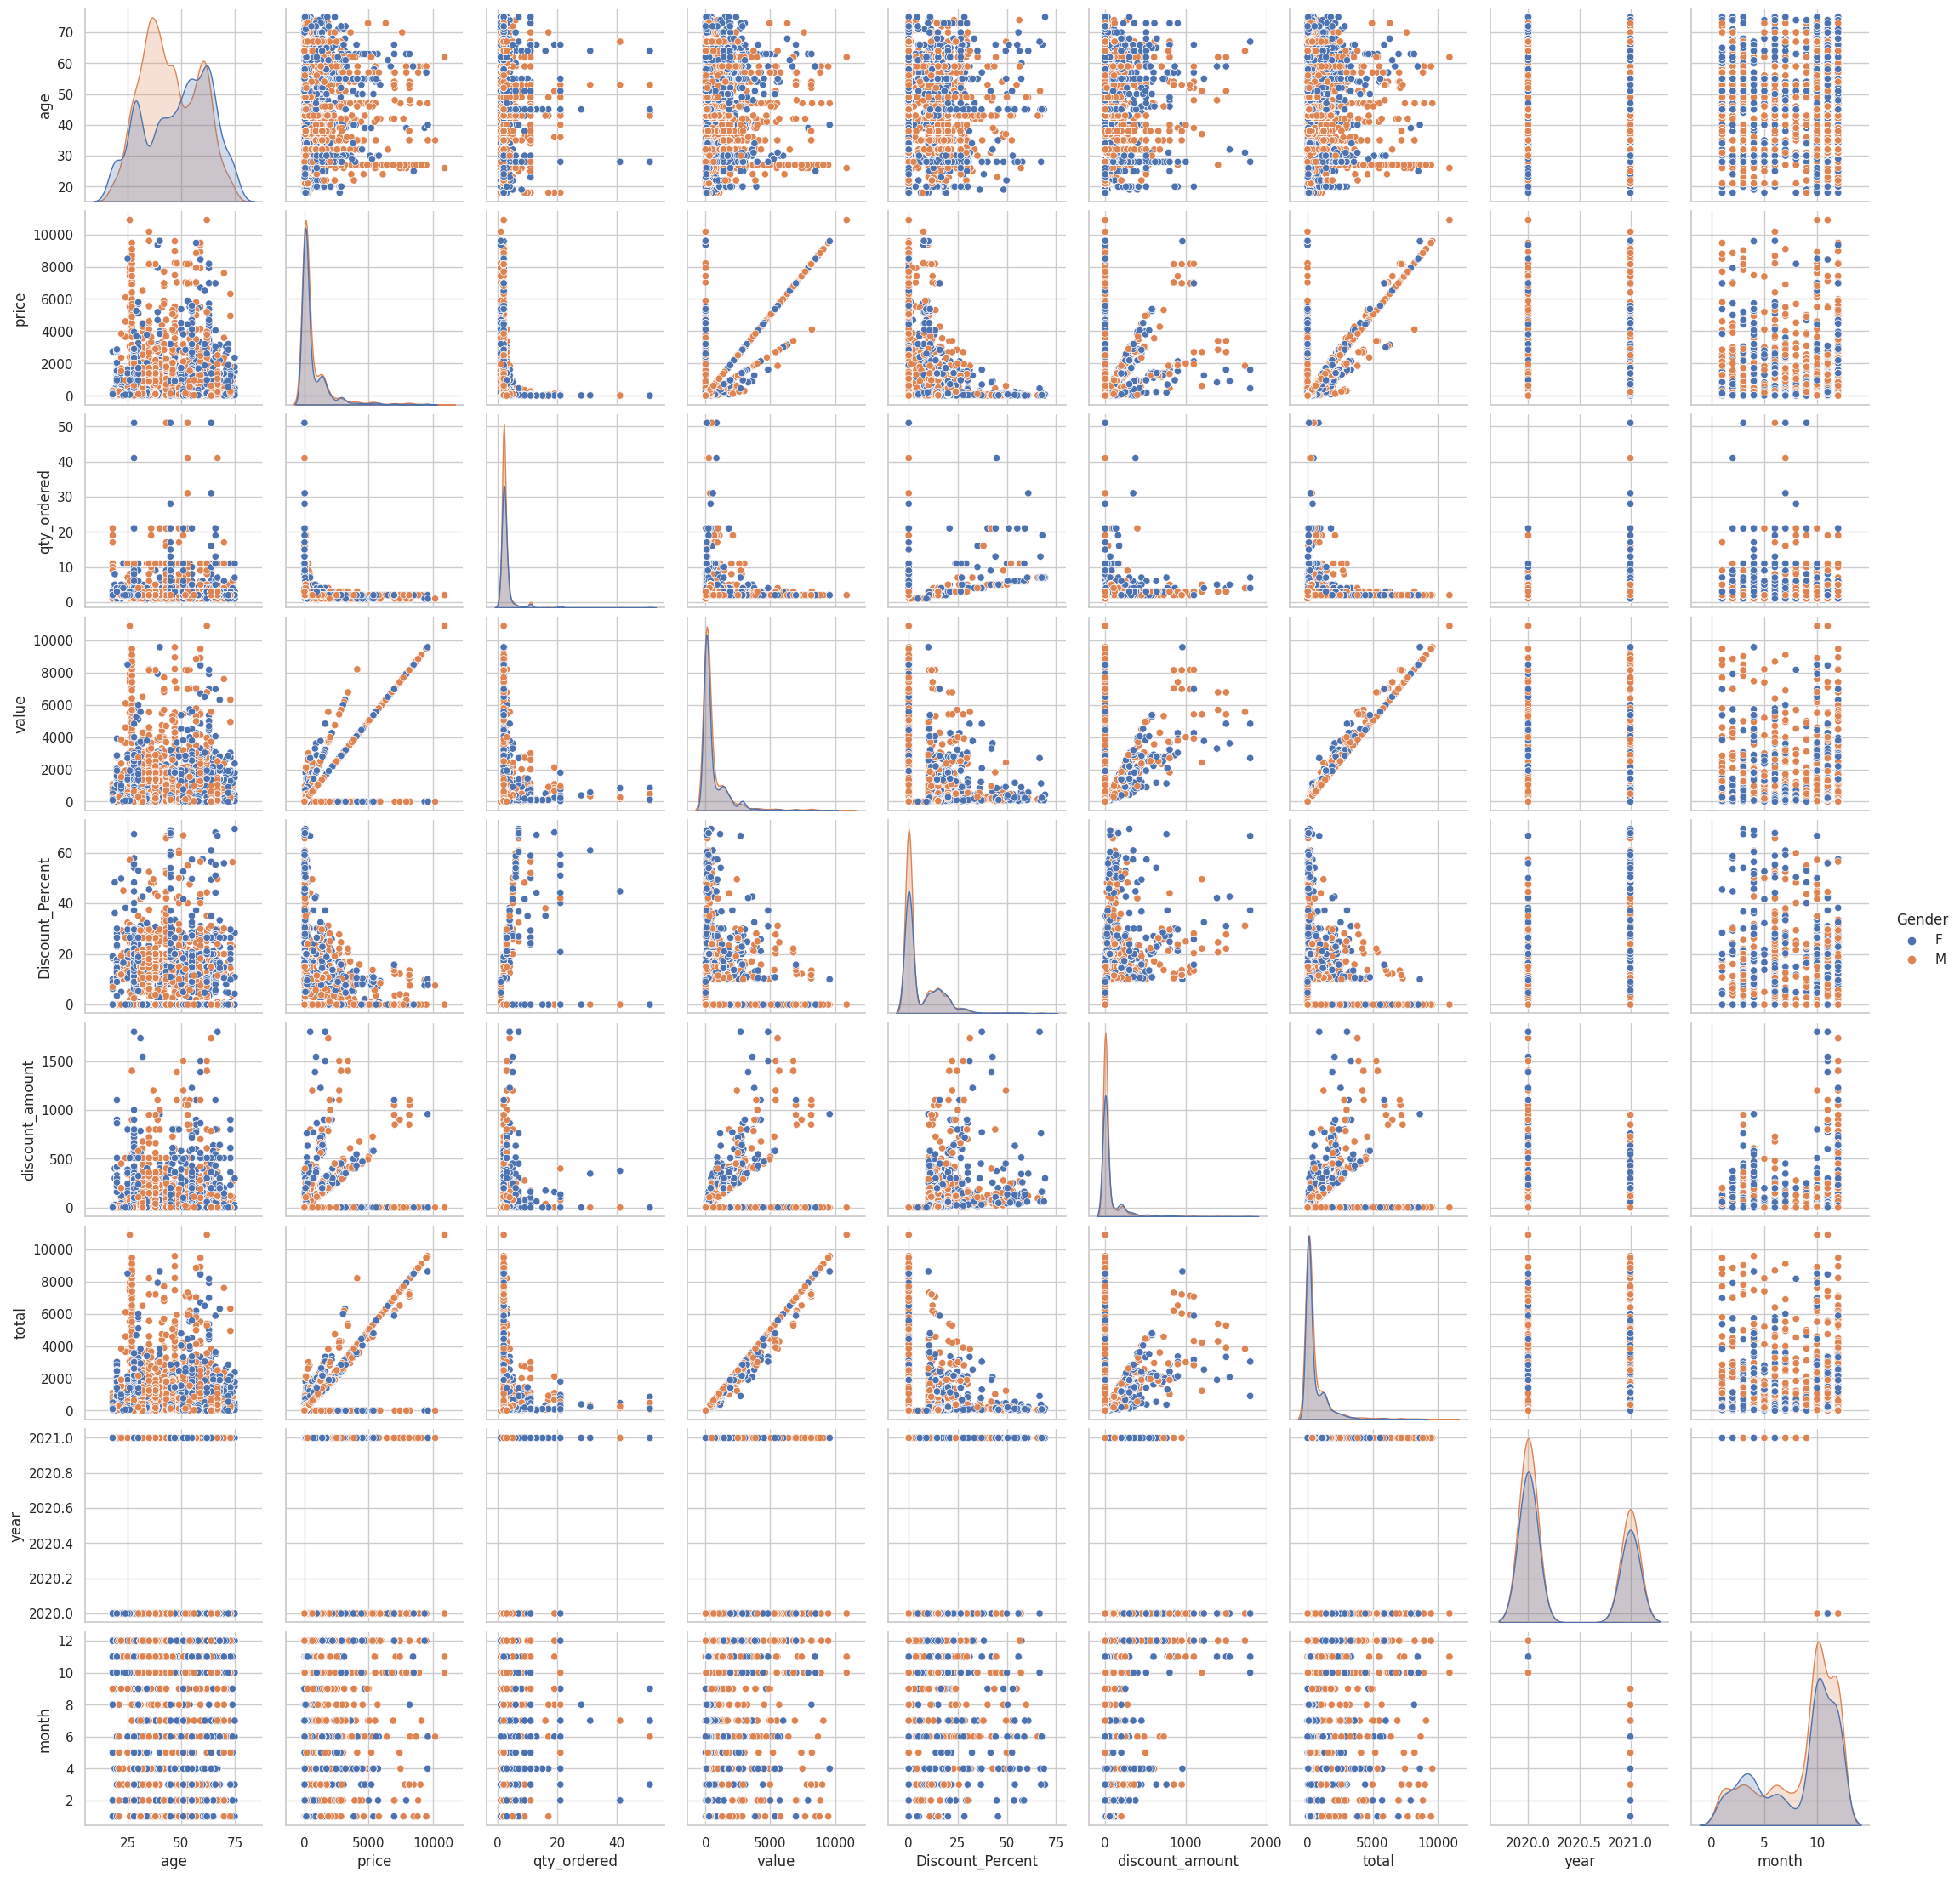

In [ ]:
sns.pairplot(df, hue="Gender")
plt.show()

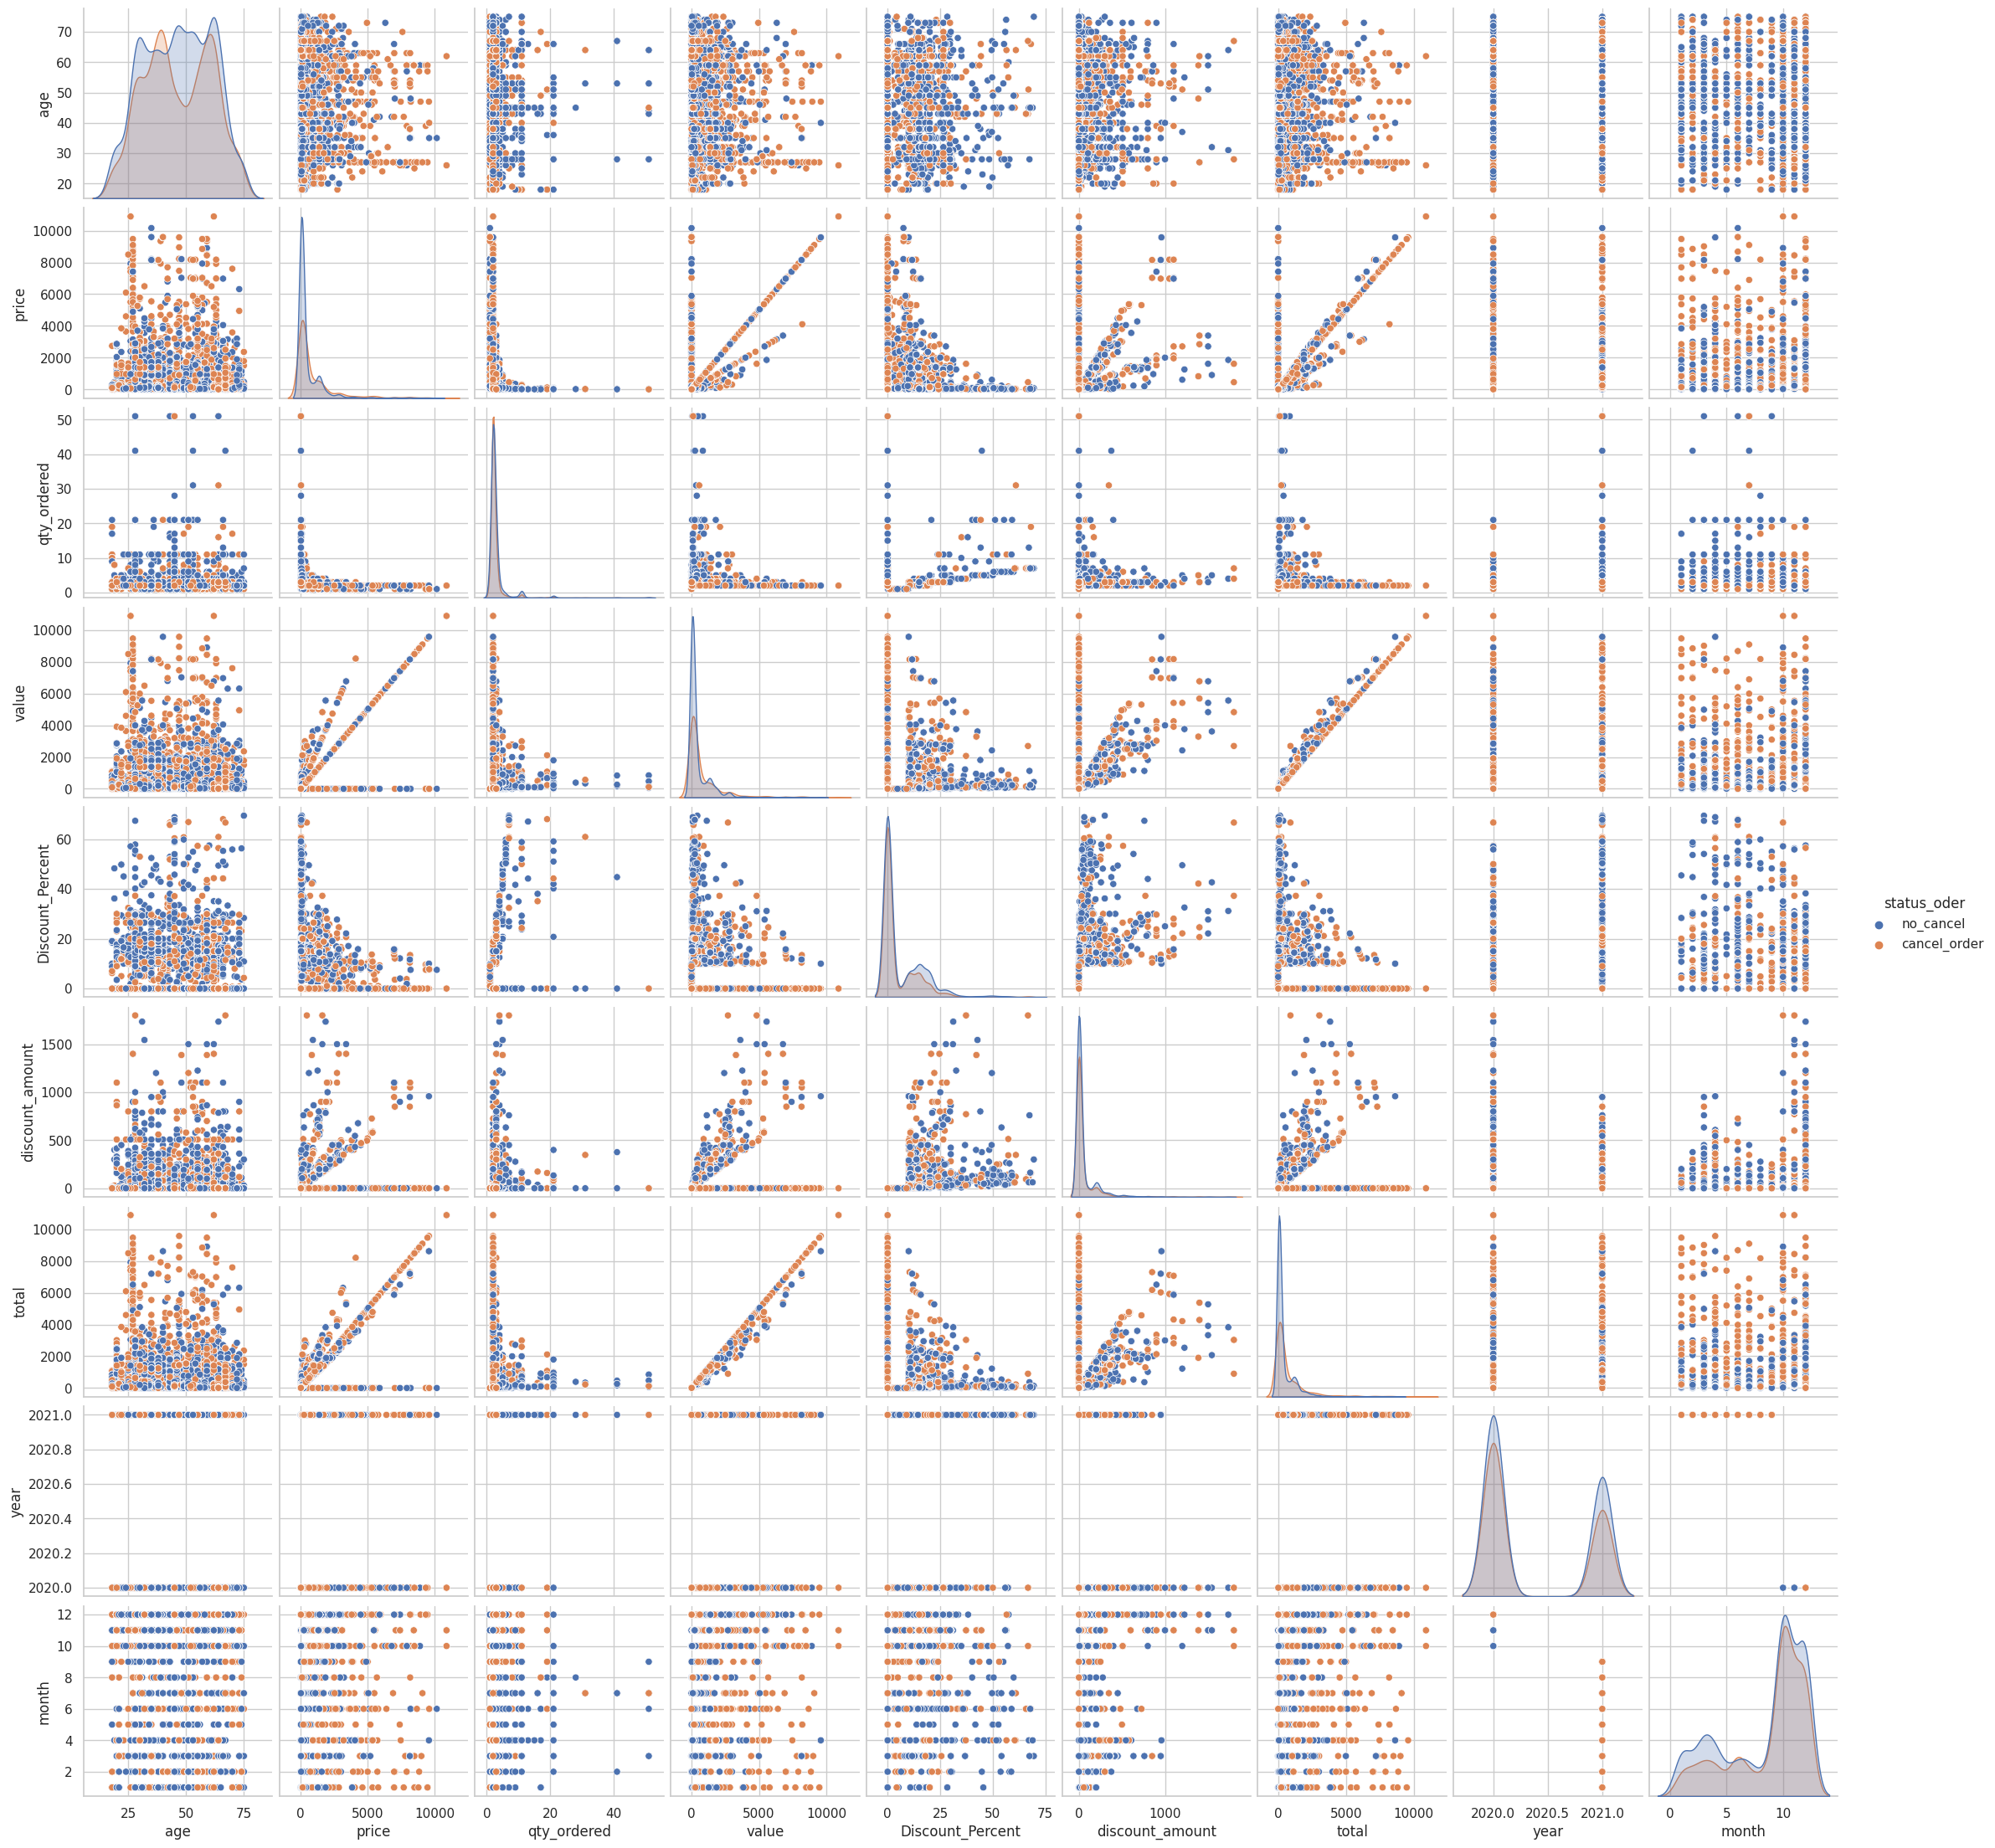

In [ ]:
sns.pairplot(df, hue="status_oder")
plt.show()

## 7. Declare feature vector and target variable <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [ ]:
X = df.drop(['status_oder'], axis=1)

y = df['status_oder']

## 8. Chia tập dữ liệu thành train và test <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4937, 15), (2116, 15))

## 9. Feature Engineering  <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


- **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

- I will carry out feature engineering on different types of variables.

- First, I will display the categorical and numerical variables in training set separately.

### 9.1 Display categorical variables in training set


In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender', 'category', 'payment_method', 'bi_st', 'State', 'Region']

### 9.2 Display numerical variables in training set


In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'price',
 'qty_ordered',
 'value',
 'Discount_Percent',
 'discount_amount',
 'total',
 'year',
 'month']

### 9.3 Engineering missing values in categorical variables

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Gender            0.0
category          0.0
payment_method    0.0
bi_st             0.0
State             0.0
Region            0.0
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [ ]:
# impute missing categorical variables with most frequent value



In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Gender            0
category          0
payment_method    0
bi_st             0
State             0
Region            0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Gender            0
category          0
payment_method    0
bi_st             0
State             0
Region            0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

age                 0
Gender              0
price               0
qty_ordered         0
value               0
Discount_Percent    0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
year                0
month               0
State               0
Region              0
dtype: int64

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

age                 0
Gender              0
price               0
qty_ordered         0
value               0
Discount_Percent    0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
year                0
month               0
State               0
Region              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### 9.4 Encode categorical variables


In [ ]:
# preview categorical variables in X_train

X_train[categorical].head()

Gender           category payment_method  bi_st State     Region
1231      M  Beauty & Grooming            cod  Valid    MN    Midwest
5424      F  Beauty & Grooming        Easypay  Gross    IA    Midwest
5027      M  Beauty & Grooming        Easypay    Net    WI    Midwest
5850      F         Appliances        Payaxis    Net    SD    Midwest
3873      F            Soghaat            cod    Net    PA  Northeast

In [ ]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Gender',	'category',	'payment_method',	'bi_st',	'State','Region'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

age  Gender_1  Gender_2     price  qty_ordered     value  \
1231   41         1         0  3298.900            2  3298.900   
5424   53         0         1   236.700            3   473.400   
5027   59         1         0    39.683            3    79.366   
5850   55         0         1  3789.900            2  3789.900   
3873   44         0         1    22.000            2    22.000   

      Discount_Percent  discount_amount       total  category_1  ...  \
1231          0.000000          0.00000  3298.90000           1  ...   
5424         20.000000         94.68000   378.72000           1  ...   
5027         20.000025         15.87322    63.49278           1  ...   
5850         11.345946        430.00000  3359.90000           0  ...   
3873          0.000000          0.00000    22.00000           0  ...   

      State_46  State_47  State_48  State_49  State_50  State_51  Region_1  \
1231         0         0         0         0         0         0         1   
5424         0         0         0         0         0         0         1   
5027         0         0         0         0         0         0         1   
5850         0         0         0         0         0         0         1   
3873         0         0         0         0         0         0         0   

      Region_2  Region_3  Region_4  
1231         0         0         0  
5424         0         0         0  
5027         0         0         0  
5850         0         0         0  
3873         1         0         0  

[5 rows x 95 columns]

In [ ]:
X_train.shape

(4937, 95)

We can see that from the initial 14 columns, we now have 105 columns in training set.

Similarly, I will take a look at the X_test set.

In [ ]:
X_test.head()

age  Gender_1  Gender_2  price  qty_ordered  value  Discount_Percent  \
5828   55         0         1   37.0            3   74.0               0.0   
154    38         0         1   24.9            2   24.9               0.0   
6659   45         0         1   15.5            8  108.5               0.0   
1235   41         1         0   49.0            2   49.0               0.0   
5752   55         0         1  129.9            2  129.9              10.0   

      discount_amount   total  category_1  ...  State_46  State_47  State_48  \
5828             0.00   74.00           1  ...         0         0         0   
154              0.00   24.90           0  ...         0         0         0   
6659             0.00  108.50           1  ...         0         0         0   
1235             0.00   49.00           0  ...         0         0         0   
5752            12.99  116.91           0  ...         0         0         0   

      State_49  State_50  State_51  Region_1  Region_2  Region_3  Region_4  
5828         0         0         0         1         0         0         0  
154          0         0         0         0         0         0         1  
6659         0         0         0         1         0         0         0  
1235         0         0         0         1         0         0         0  
5752         0         0         0         1         0         0         0  

[5 rows x 95 columns]

In [ ]:
X_test.shape

(2116, 95)

* We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called **feature scaling**. We will do it as follows.

## 10. Feature Scaling <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

In [ ]:
cols = X_train.columns


In [ ]:
cols

Index(['age', 'Gender_1', 'Gender_2', 'price', 'qty_ordered', 'value',
       'Discount_Percent', 'discount_amount', 'total', 'category_1',
       'category_2', 'category_3', 'category_4', 'category_5', 'category_6',
       'category_7', 'category_8', 'category_9', 'category_10', 'category_11',
       'category_12', 'category_13', 'category_14', 'category_15',
       'payment_method_1', 'payment_method_2', 'payment_method_3',
       'payment_method_4', 'payment_method_5', 'payment_method_6',
       'payment_method_7', 'payment_method_8', 'payment_method_9',
       'payment_method_10', 'payment_method_11', 'bi_st_1', 'bi_st_2',
       'bi_st_3', 'year', 'month', 'State_1', 'State_2', 'State_3', 'State_4',
       'State_5', 'State_6', 'State_7', 'State_8', 'State_9', 'State_10',
       'State_11', 'State_12', 'State_13', 'State_14', 'State_15', 'State_16',
       'State_17', 'State_18', 'State_19', 'State_20', 'State_21', 'State_22',
       'State_23', 'State_24', 'State_25', 'State_26',

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

We now have X_train dataset ready to be fed into the Random Forest classifier. We will do it as follows.

## 11. Random Forest Classifier model with default parameters <a class="anchor" id="11"></a>


[Back to Table of Contents](#0.1)

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9249


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## 12. Random Forest Classifier model with 100 Decision Trees  <a class="anchor" id="12"></a>



[Back to Table of Contents](#0.1)

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9249


The model accuracy score with 10 decision-trees is 0.9249 but the same with 100 decision-trees is 0.9249. So, as expected accuracy increases with number of decision-trees in the model.

## 13. Find important features with Random Forest model <a class="anchor" id="13"></a>


[Back to Table of Contents](#0.1)


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.


First, I will create the Random Forest model as follows:-

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=True)

feature_scores

State_35    0.000006
State_48    0.000017
State_47    0.000027
State_50    0.000094
State_49    0.000121
              ...   
total       0.052231
bi_st_1     0.059505
price       0.060030
bi_st_3     0.220864
bi_st_2     0.232245
Length: 95, dtype: float64

In [ ]:
# Lấy chỉ mục (index) từ feature_scores
feature_indices = feature_scores.index

# Lấy giá trị (value) từ feature_scores
feature_values = feature_scores.values

In [ ]:
feature_indices

MultiIndex([(         'State_35',),
            (         'State_48',),
            (         'State_47',),
            (         'State_50',),
            (         'State_49',),
            (      'category_14',),
            (         'State_51',),
            (      'category_15',),
            (         'State_41',),
            (          'State_7',),
            (         'State_38',),
            (         'State_32',),
            (         'State_29',),
            (         'State_36',),
            (         'State_39',),
            (         'State_46',),
            (         'State_42',),
            (         'State_37',),
            (         'State_34',),
            (         'State_33',),
            (          'State_6',),
            (         'State_40',),
            ('payment_method_11',),
            ('payment_method_10',),
            (         'State_45',),
            (         'State_31',),
            (         'State_43',),
            (         'State

We can see that the most important feature is `State` and least important feature is `State_35 `.

## 14. Visualize feature scores of the features <a class="anchor" id="14"></a>


[Back to Table of Contents](#0.1)


Now, I will visualize the feature scores with matplotlib and seaborn.

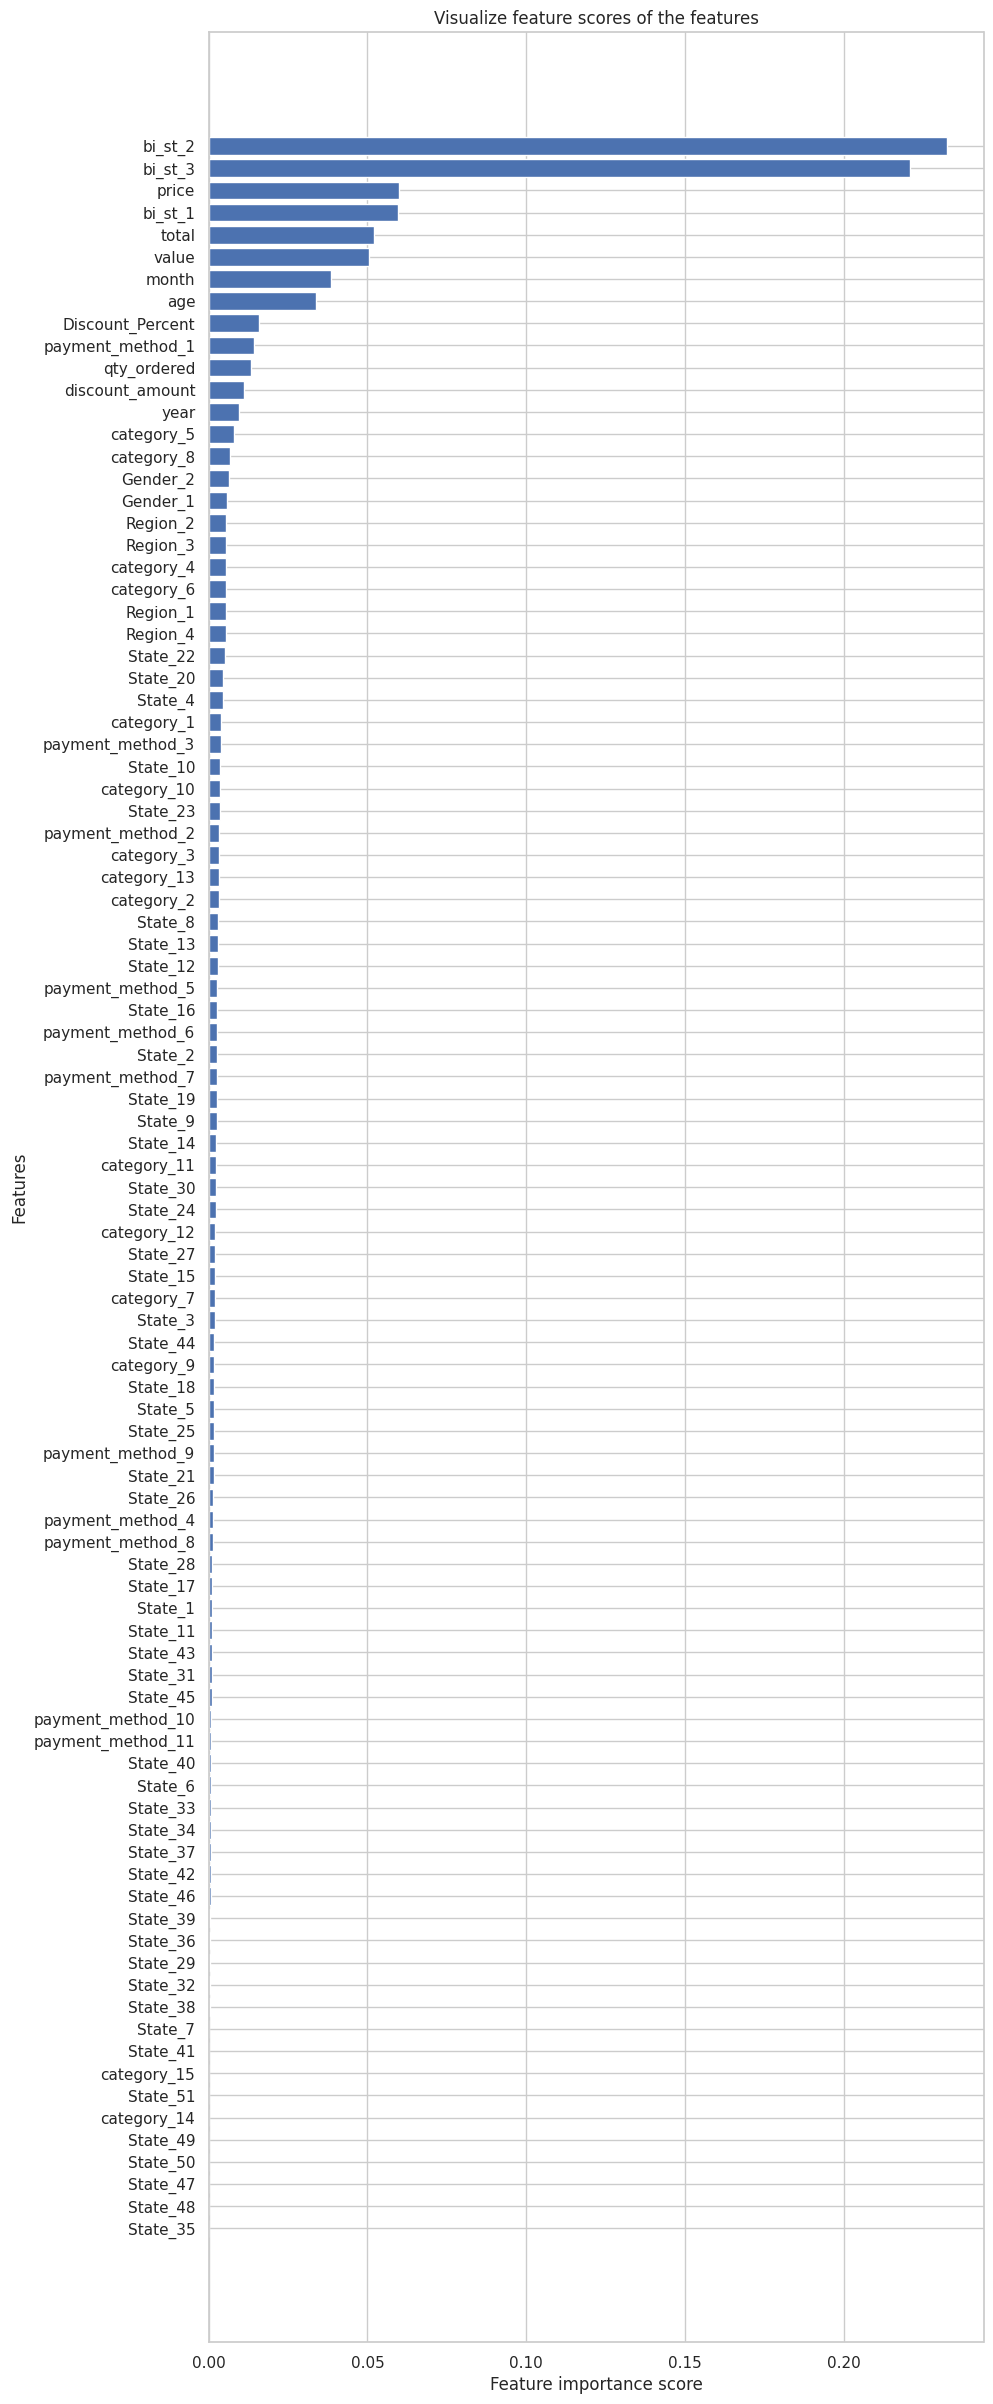

In [ ]:
# Trích xuất giá trị và chỉ mục
indices = [idx[0] for idx in feature_indices]
values = feature_values.flatten()

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 30))
plt.barh(indices, values)
plt.title("Visualize feature scores of the features")
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.show()







#### Interpretation


- Biểu đồ trên xác nhận rằng tính năng quan trọng nhất là bi_st_2 và tính năng ít quan trọng nhất là State_35.

## 15. Build the Random Forest model on selected features <a class="anchor" id="15"></a>


[Back to Table of Contents](#0.1)


Now, I will drop the least important feature `native_country_41` from the model, rebuild the model and check its effect on accuracy.

In [ ]:
# drop the least important feature from X_train and X_test

X_test = X_test.drop(['State_35'], axis=1)
X_test = X_test.drop(['State_48'], axis=1)
X_test = X_test.drop(['State_47'], axis=1)
X_test = X_test.drop(['State_50'], axis=1)
X_test = X_test.drop(['State_49'], axis=1)

X_train = X_train.drop(['State_35'], axis=1)
X_train = X_train.drop(['State_48'], axis=1)
X_train = X_train.drop(['State_47'], axis=1)
X_train = X_train.drop(['State_50'], axis=1)
X_train = X_train.drop(['State_49'], axis=1)


Now, I will build the random forest model again and check accuracy.

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score
print('Model accuracy score with 5 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 5 variable removed : 0.9286


In [ ]:
X_train

age Gender_1 Gender_2     price qty_ordered     value  \
0    -0.208333      0.0      0.0  3.993751         0.0  5.007773   
1     0.291667     -1.0      1.0  0.166479         1.0  0.548300   
2     0.541667      0.0      0.0 -0.079761         1.0 -0.073602   
3     0.375000     -1.0      1.0  4.607424         0.0  5.782716   
4    -0.083333     -1.0      1.0 -0.101862         0.0 -0.164143   
...        ...      ...      ...       ...         ...       ...   
4932  0.541667     -1.0      1.0  0.720535         0.0  0.874376   
4933  0.000000      0.0      0.0 -0.086114         0.0 -0.144256   
4934 -0.458333      0.0      0.0  0.020622         0.0 -0.009470   
4935 -0.666667      0.0      0.0 -0.120735         0.0 -0.187975   
4936 -0.416667      0.0      0.0  0.179978         2.0  0.973019   

     Discount_Percent discount_amount     total category_1  ... State_42  \
0            0.000000        0.000000  5.111504        1.0  ...      0.0   
1            1.799273        7.189066  0.419698        1.0  ...      0.0   
2            1.799275        1.205256 -0.086773        1.0  ...      0.0   
3            1.020723       32.649962  5.209512        0.0  ...      0.0   
4            0.000000        0.000000 -0.153438        0.0  ...      0.0   
...               ...             ...       ...        ...  ...      ...   
4932         0.899636        5.163250  0.794505        0.0  ...      0.0   
4933         0.000000        0.000000 -0.133194        0.0  ...      0.0   
4934         0.000000        0.000000  0.004017        0.0  ...      0.0   
4935         0.000000        0.000000 -0.177699        0.0  ...      0.0   
4936         0.000000        0.000000  1.004177        1.0  ...      0.0   

     State_43 State_44 State_45 State_46 State_51 Region_1 Region_2 Region_3  \
0         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4932      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
4933      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4934      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4935      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4936      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

     Region_4  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
4932      0.0  
4933      0.0  
4934      0.0  
4935      0.0  
4936      0.0  

[4937 rows x 90 columns]

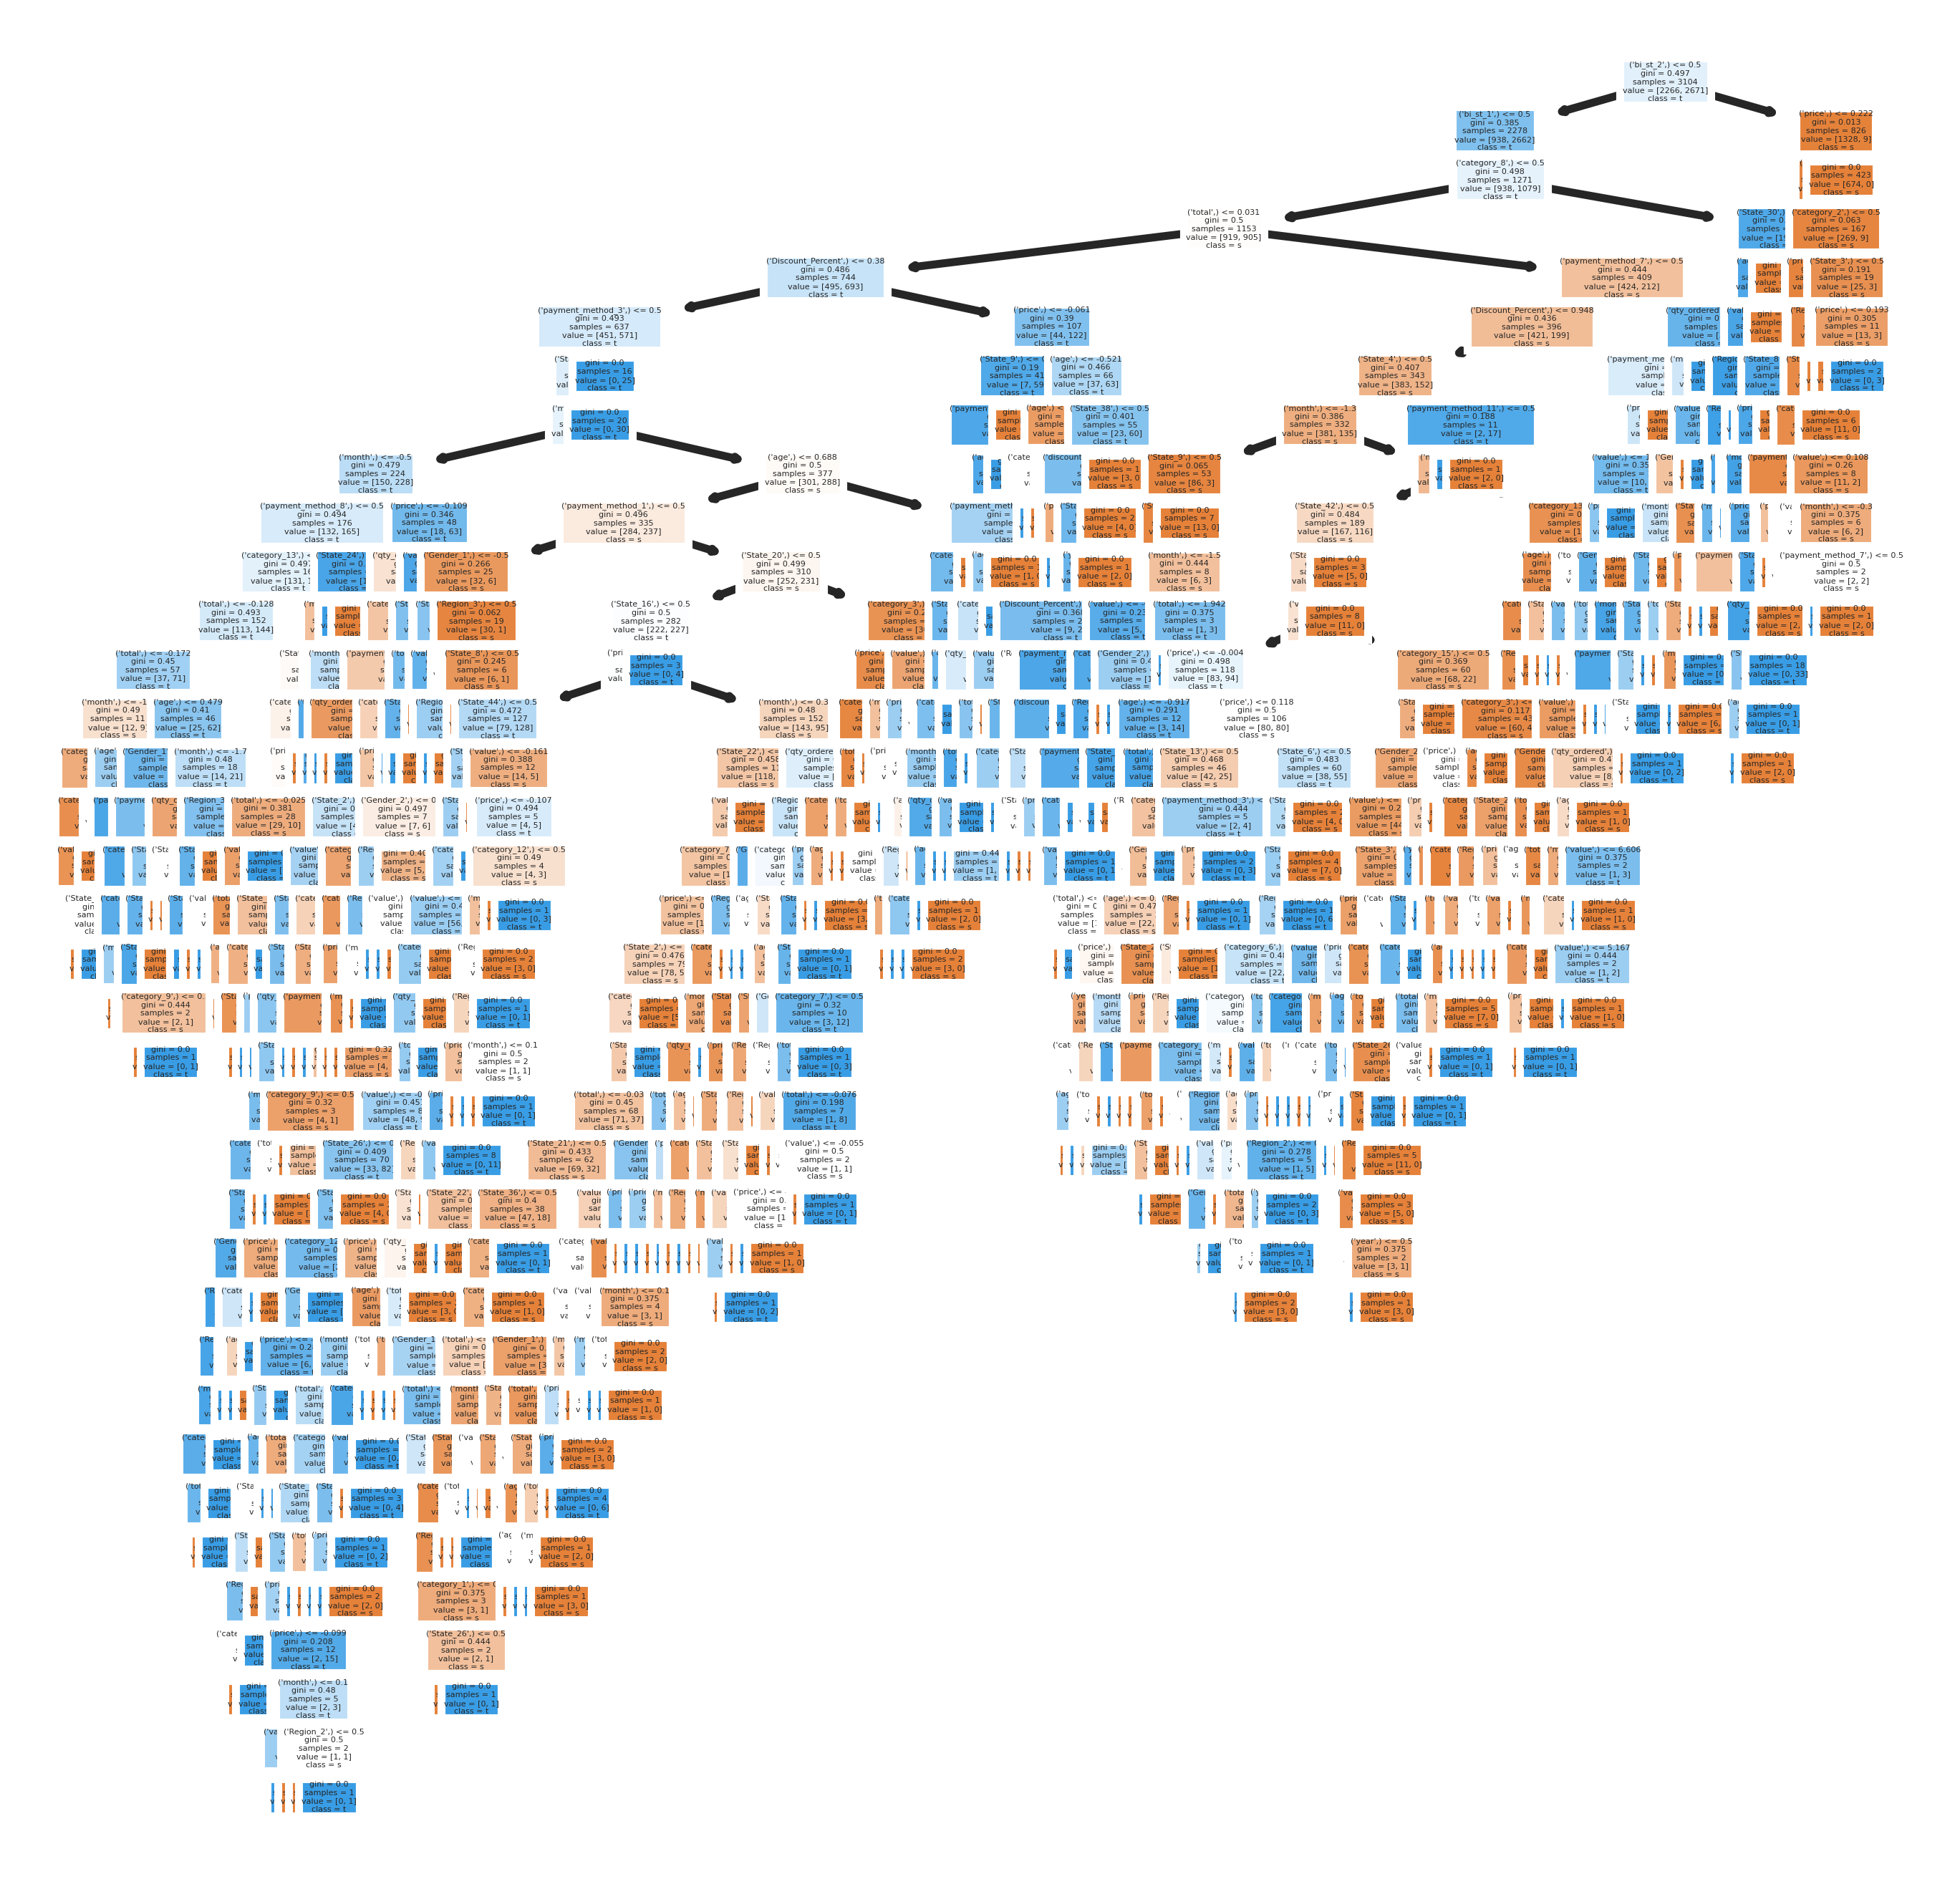

In [ ]:
from sklearn import tree
fn=X_train.columns
cn='status_oder'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
feature_names = fn,
class_names=cn,
filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
y_train.values

array(['cancel_order', 'cancel_order', 'no_cancel', ..., 'no_cancel',
       'cancel_order', 'cancel_order'], dtype=object)

#### Interpretation

- I have removed the `State_35` variable from the model, rebuild it and checked its accuracy.

- The accuracy of the model now comes out to be 0.9253.

- The accuracy of the model with all the variables taken into account is 0.9253

- So, we can see that the model accuracy has been improved with `State_35 ` variable removed from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

## 16. Confusion matrix <a class="anchor" id="16"></a>


[Back to Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 873   71]
 [  80 1092]]


<Axes: >

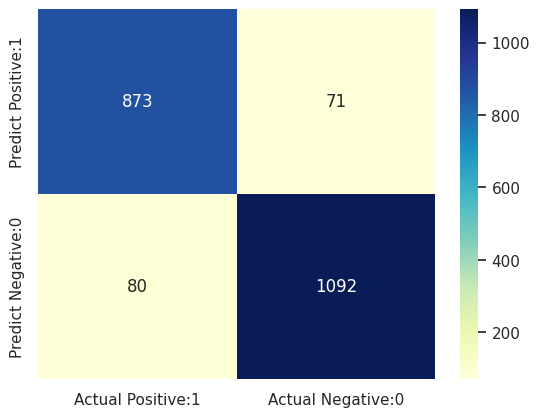

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

[Go to Top](#0)

In [ ]:
X_train

age Gender_1 Gender_2     price qty_ordered     value  \
0    -0.208333      0.0      0.0  3.993751         0.0  5.007773   
1     0.291667     -1.0      1.0  0.166479         1.0  0.548300   
2     0.541667      0.0      0.0 -0.079761         1.0 -0.073602   
3     0.375000     -1.0      1.0  4.607424         0.0  5.782716   
4    -0.083333     -1.0      1.0 -0.101862         0.0 -0.164143   
...        ...      ...      ...       ...         ...       ...   
4932  0.541667     -1.0      1.0  0.720535         0.0  0.874376   
4933  0.000000      0.0      0.0 -0.086114         0.0 -0.144256   
4934 -0.458333      0.0      0.0  0.020622         0.0 -0.009470   
4935 -0.666667      0.0      0.0 -0.120735         0.0 -0.187975   
4936 -0.416667      0.0      0.0  0.179978         2.0  0.973019   

     Discount_Percent discount_amount     total category_1  ... State_42  \
0            0.000000        0.000000  5.111504        1.0  ...      0.0   
1            1.799273        7.189066  0.419698        1.0  ...      0.0   
2            1.799275        1.205256 -0.086773        1.0  ...      0.0   
3            1.020723       32.649962  5.209512        0.0  ...      0.0   
4            0.000000        0.000000 -0.153438        0.0  ...      0.0   
...               ...             ...       ...        ...  ...      ...   
4932         0.899636        5.163250  0.794505        0.0  ...      0.0   
4933         0.000000        0.000000 -0.133194        0.0  ...      0.0   
4934         0.000000        0.000000  0.004017        0.0  ...      0.0   
4935         0.000000        0.000000 -0.177699        0.0  ...      0.0   
4936         0.000000        0.000000  1.004177        1.0  ...      0.0   

     State_43 State_44 State_45 State_46 State_51 Region_1 Region_2 Region_3  \
0         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4932      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
4933      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4934      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4935      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4936      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

     Region_4  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
4932      0.0  
4933      0.0  
4934      0.0  
4935      0.0  
4936      0.0  

[4937 rows x 90 columns]

# Sử dụng thuật toán Logistic Regression để dự đoán xem đơn hàng này có nguy cơ bị hủy hay không

In [ ]:
y_train

1231    cancel_order
5424    cancel_order
5027       no_cancel
5850       no_cancel
3873       no_cancel
            ...     
4931       no_cancel
3264       no_cancel
1653       no_cancel
2607    cancel_order
2732    cancel_order
Name: status_oder, Length: 4937, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Chuyển data từ dạng chữ về dạng nhị phân
y_train = y_train.map({'cancel_order': 1, 'no_cancel': 0})



## Khai báo model LogisticRegression và tiến hành train dữ liệu

In [ ]:
# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


## Đưa data về dạng nhị phân

In [ ]:
y_test = y_test.map({'cancel_order': 1, 'no_cancel': 0})

## Tính độ chính xác

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8898865784499055


## Biểu đồ thể hiện

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1048  124]
 [ 109  835]]


<Axes: >

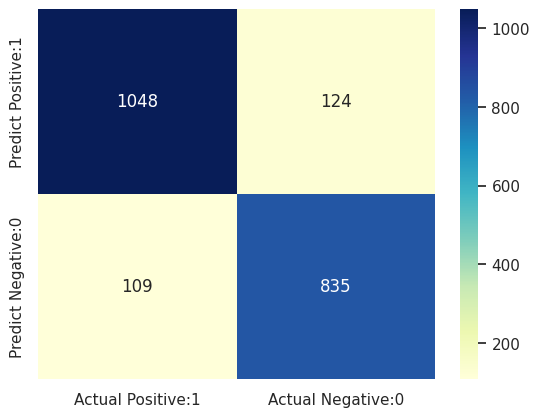

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')